# Meetup Demos:

###  Exactract Data Using Facebook GraphAPI

##### Get Token [User Token]

In [203]:
import facebook as fb
%matplotlib notebook
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams
from mpltools import style
from matplotlib import dates
from datetime import datetime
import seaborn as sns
import time
import os
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
import random
import matplotlib
matplotlib.use('TkAgg')
from pytagcloud import make_tags, create_tag_image, LAYOUT_MIX
from pytagcloud.colors import COLOR_SCHEMES
from pytagcloud.lang.counter import get_tag_counts
import cProfile
import os
import pstats
import numpy as np

/Users/mozilla/virtualenvs/mermi/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [59]:
import json
from collections import namedtuple
import pandas as pd
from pandas import DataFrame

In [49]:
token= 'EAACEdEose0cBAGB0OTE8qUaF0qWzgwOIzv0bYAr8P3ZCTY1bKVs9Y5XZAUVevKkZBdoasvyetJ575pgKyww9r4E8G7ZAJdXMAW3uZCzWgNfhlebRqWiR4zjfavb73QmYUimM9wM3G4POCXVnQVAZCkVjEosnb0fZBxXVZCKEv5P5QdDj6a84jnZB8y3BETl9hPn8ZD'

In [53]:
graph = fb.GraphAPI(access_token=token, version='2.6')

In [54]:
events = graph.request('me?fields=name,about,birthday,gender,hometown,languages,quotes')

In [55]:
events

{'birthday': '02/06/1992',
 'gender': 'female',
 'hometown': {'id': '111663698852329', 'name': 'Tunis, Tunisia'},
 'id': '652482534822482',
 'languages': [{'id': '110485178971978', 'name': 'Arabic'},
  {'id': '106059522759137', 'name': 'English'},
  {'id': '108224912538348', 'name': 'Français'}],
 'name': 'Manel Rhaiem',
 'quotes': 'Ignoring your passion is slow suicide. Never ignore what your heart pumps for. Mold your career around your lifestyle not your lifestyle around your career'}

In [70]:
df = pd.DataFrame([events], columns=['birthday', 'gender', 'hometown', 'languages', 'name', 'quotes'])

In [71]:
df

,birthday,gender,hometown,languages,name,quotes
0,02/06/1992,female,"{'id': '111663698852329', 'name': 'Tunis, Tuni...","[{'id': '110485178971978', 'name': 'Arabic'}, ...",Manel Rhaiem,Ignoring your passion is slow suicide. Never i...


In [73]:
my_text = "gender female hometown Tunis, Tunisia languages Arabic English Français Manel Rhaiem quotes Ignoring your passion is slow suicide. Never ignore what your heart pumps for. Mold your career around your lifestyle not your lifestyle around your \
career about #Reps @MozillaTunisia , Mozilla Tech Speaker, Data engineering junior, tech speaker, passionate about data, love music and Zumba. Looking for happiness everywhere"

In [84]:
# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")
wc = WordCloud(max_words=1000, stopwords=stopwords, margin=10,random_state=1).generate(my_text)


<IPython.core.display.Javascript object>


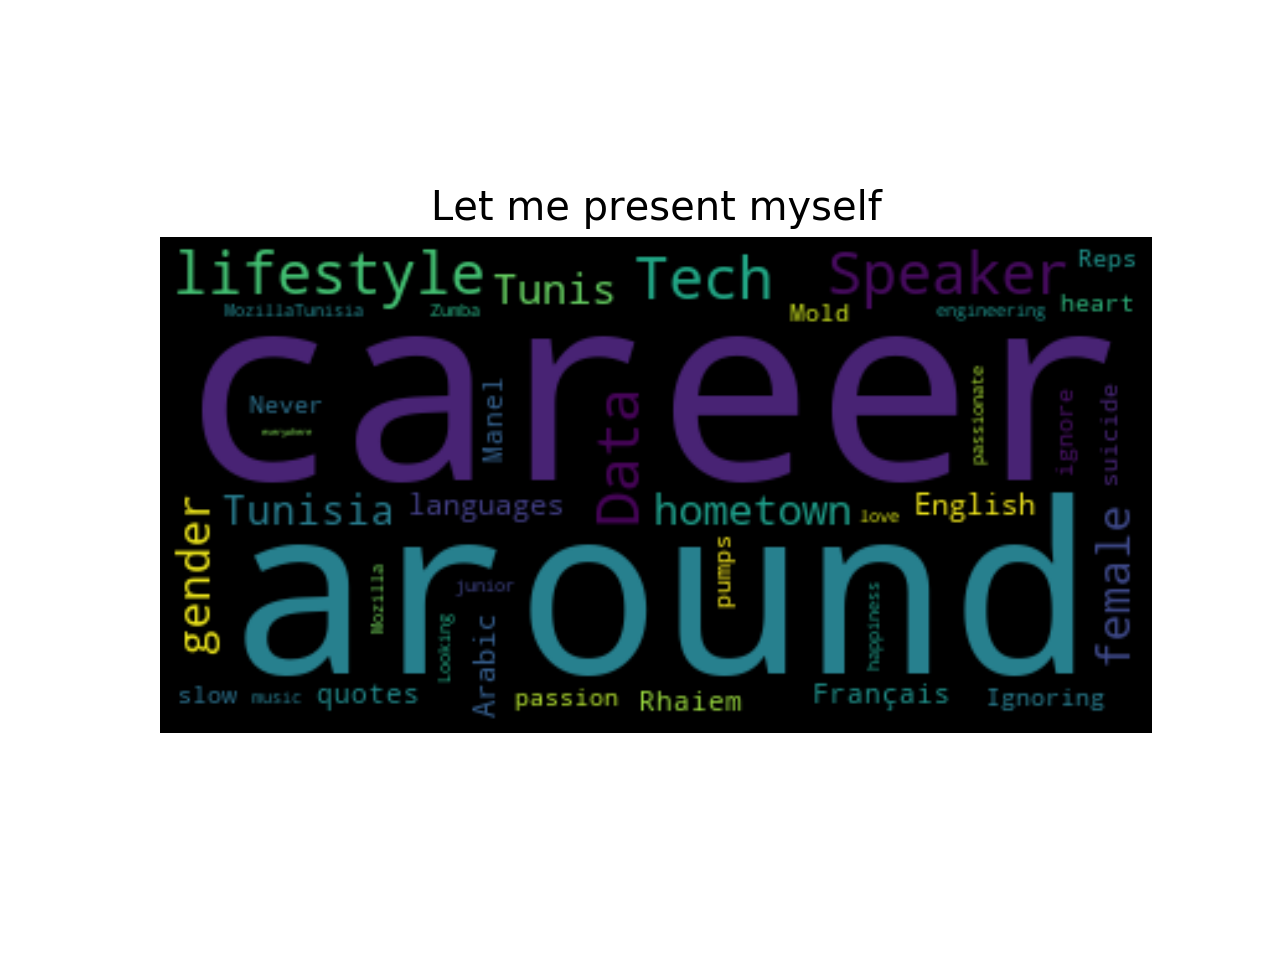

In [85]:
wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure()
plt.title("Let me present myself")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

### Wine example

In [3]:
!head data/winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7


In [86]:
red = pd.read_table('data/winequality-red.csv', error_bad_lines=False, sep=';')

In [87]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Variable description  
Description of attributes:  
1. **Fixed acidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)  
2. **Volatile acidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste  
3. **Citric acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines  
4. **Residual sugar**: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet  
5. **Chlorides**: the amount of salt in the wine  
6. **Free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine  
7. **Total sulfur dioxide**: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine  
8. **Density**: the density of water is close to that of water depending on the percent alcohol and sugar content 
9. **pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale  
10. **Sulphates**: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant  
11. **Alcohol**: the percent alcohol content of the wine  
12. **Quality**: output variable (based on sensory data, score between 0 and 10) 

By performing this analysis, we seek to answer the following questions:  
1. How is the quality of the wines tasted?  
2. What is the minimum set of properties and their values that defines a high quality wine?  
3. What are considered wine defects? 

In [88]:
X = red.drop('quality' , 1).values # drop target variable
y1 = red['quality'].values

<IPython.core.display.Javascript object>


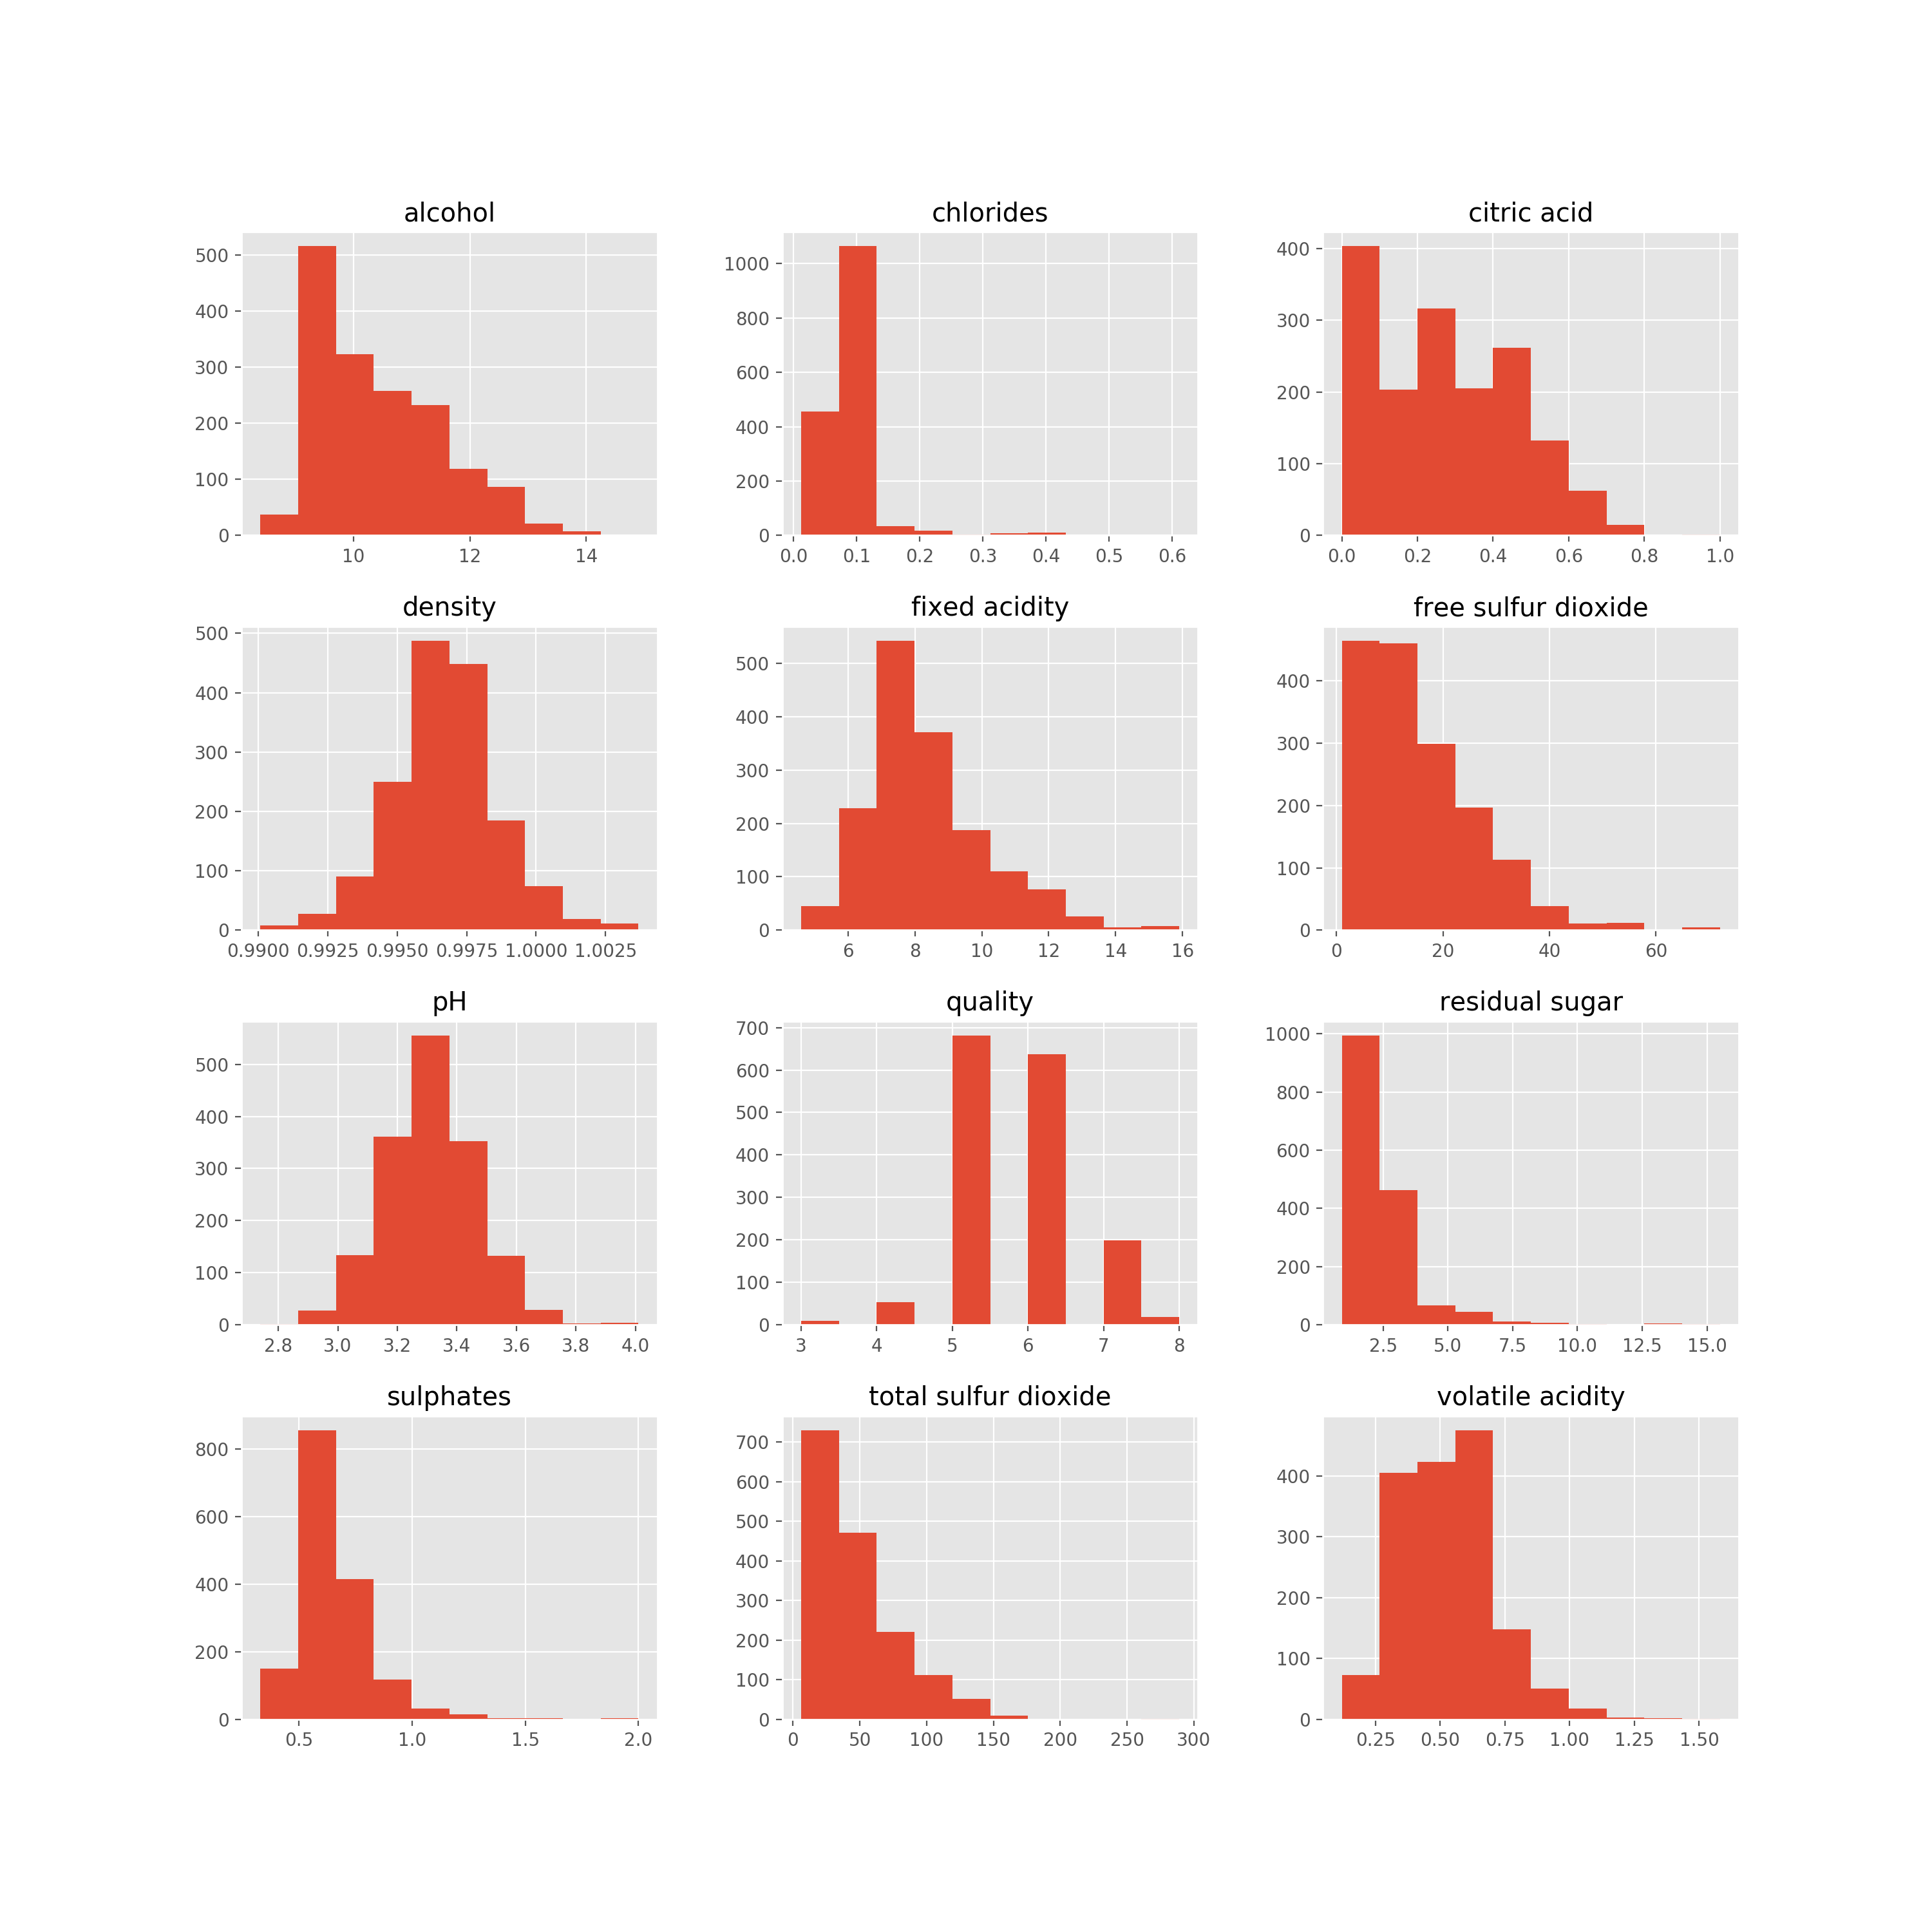

In [89]:
pd.DataFrame.hist(red, figsize = [15,15]);

<IPython.core.display.Javascript object>


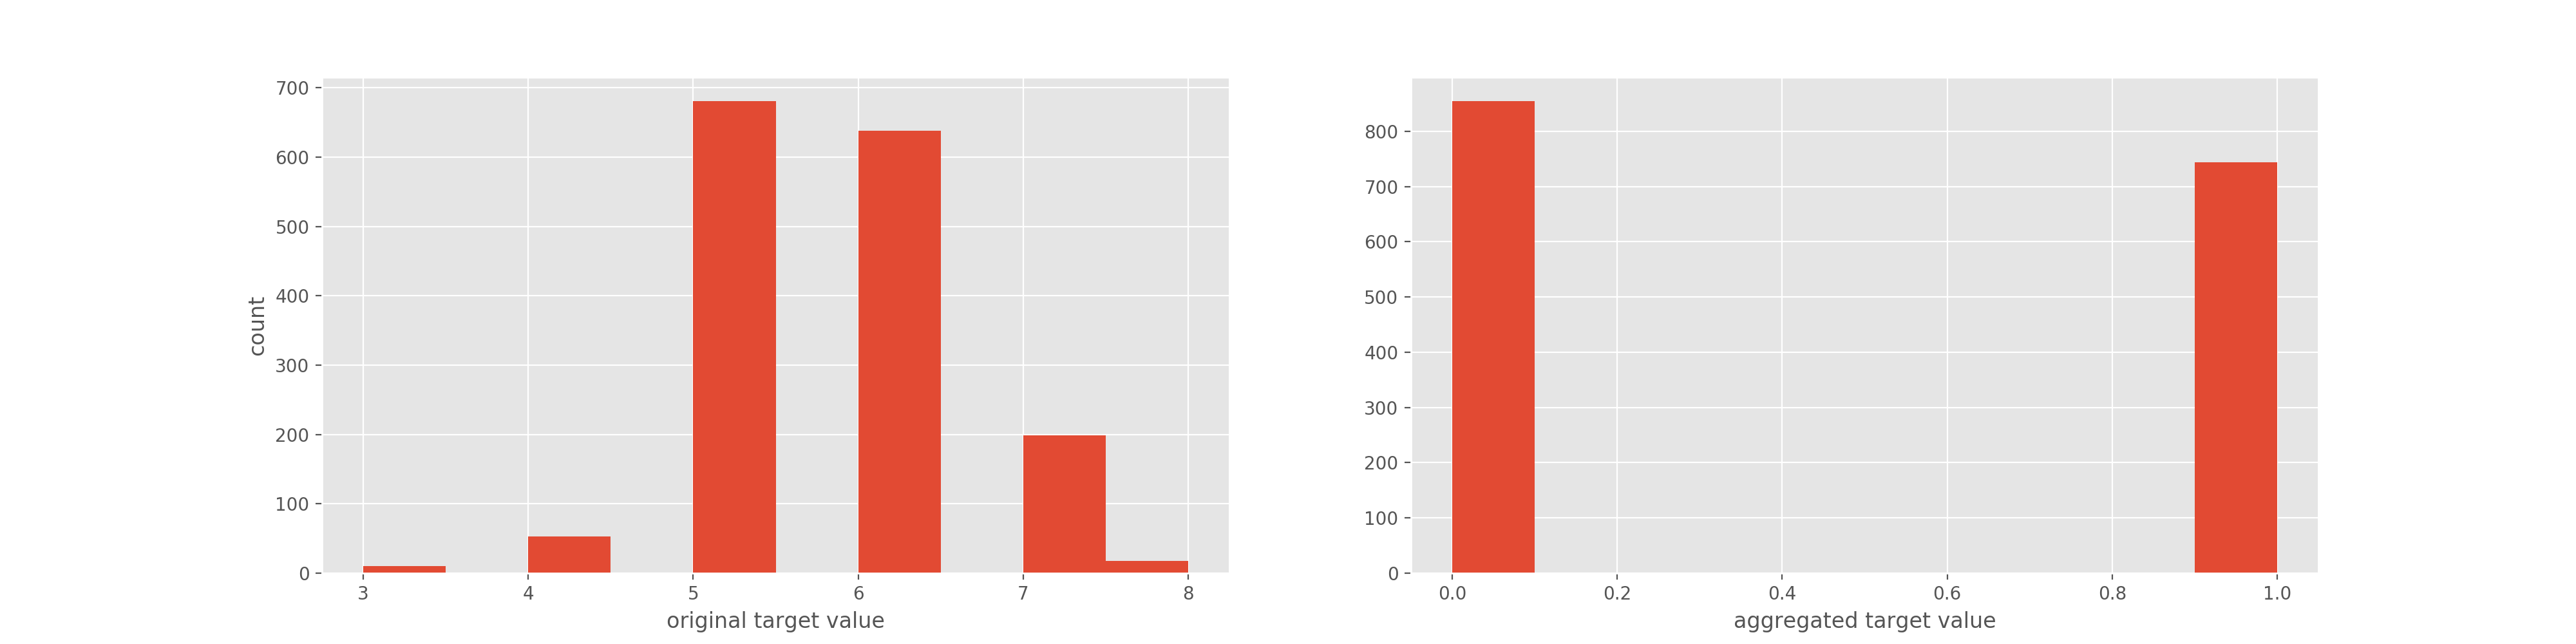

In [90]:
y = y1 <= 5 # is the rating <= 5?
# plot histograms of original target variable
# and aggregated target variable
plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.hist(y1);
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2);
plt.hist(y)
plt.xlabel('aggregated target value')
plt.show()

### Make some simple aggregations

In [91]:
max_quality = max(red['quality'])
print(max_quality)

8


In [92]:
min_quality = min(red['quality'])
print(min_quality)

3


In [93]:
mean_quality = red['quality'].mean()
print(mean_quality)

5.63602251407


In [94]:
median_quality = red['quality'].median()
print(median_quality)

6.0


In [95]:
summary = red.describe()
summary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [96]:
from sklearn.preprocessing import scale
wine = scale(red)

In [97]:
from scipy.stats import iqr

In [98]:
quality_iqr = iqr(red['quality'])

In [99]:
reds_quality_q1 = median_quality - quality_iqr

In [100]:
reds_quality_q3 = median_quality + quality_iqr

In [101]:
reds_quality_mode = red['quality'].value_counts()
reds_quality_mode

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

So the most given quality score is 5.

But how disperse is the distribution of quality scores? The IQR goes from 5 for the lower qartile, to 7 for the upper one, around the median of 6 or second quartile. We could then consider any quality value of less than 3.5 or more than 8.5 an outlier. Do we have any of them?

In [107]:
reds_outliers = sum(red['quality'] < reds_quality_q1 - 1.5*quality_iqr)

In [108]:
reds_outliers = reds_outliers + sum(red['quality'] > reds_quality_q3 + 1.5*quality_iqr)

In [109]:
reds_outliers

10

What about the dispersion around the mean?


In [110]:
import numpy
reds_quality_sd = numpy.std(red['quality'], axis=0)
reds_quality_sd

0.80731687696395127

#### With a standard deviation of 0.8075694, our distribution of quality scores is not very disperse.

In [102]:
from sklearn.cluster import KMeans
%matplotlib notebook
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=42)

In [103]:
X = red[['quality', 'alcohol']].as_matrix()
labels = kmeans.fit_predict(X)

<IPython.core.display.Javascript object>


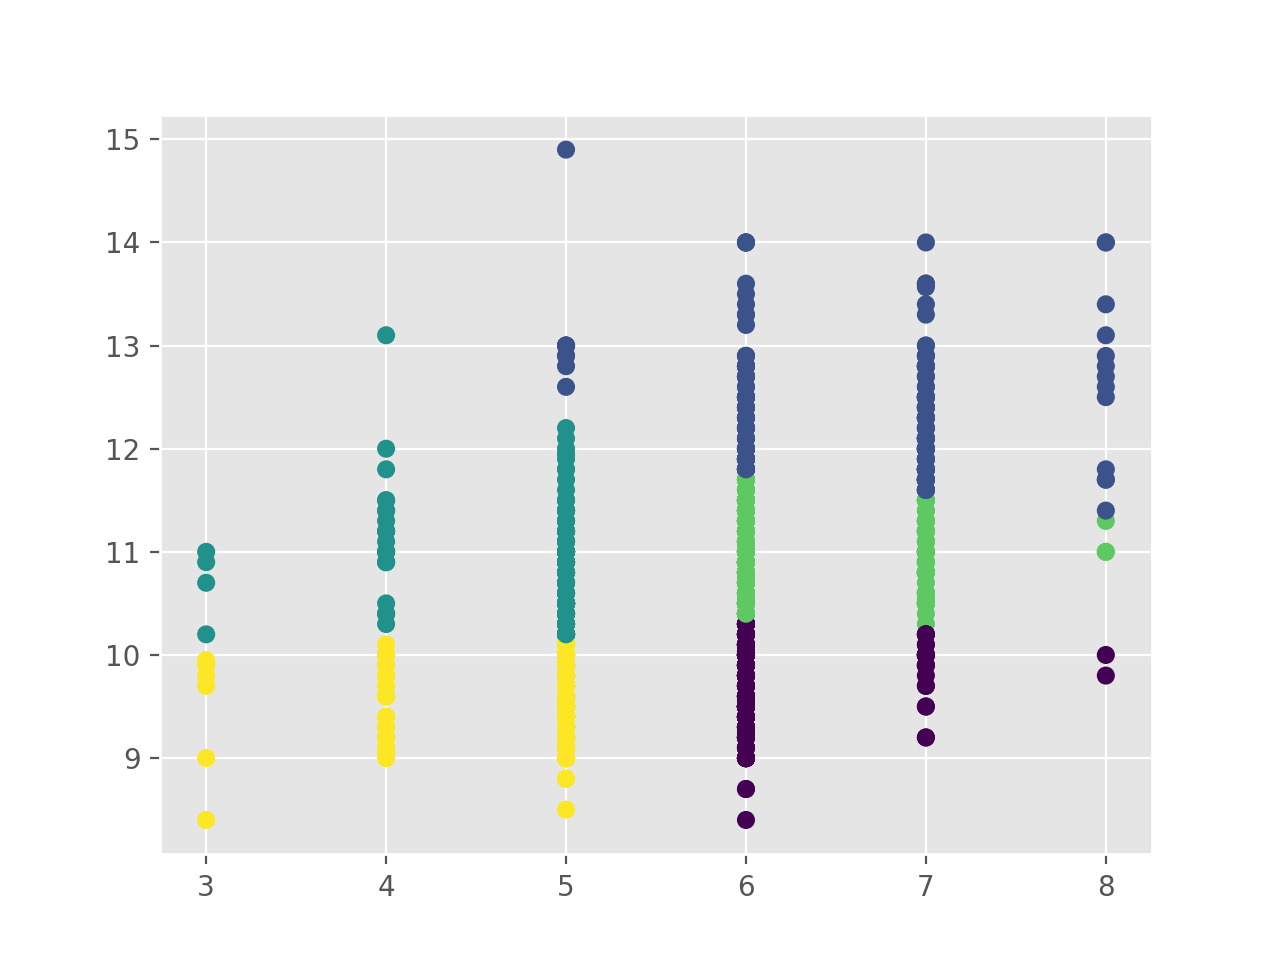

In [104]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

/Users/mozilla/virtualenvs/mermi/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/mozilla/virtualenvs/mermi/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


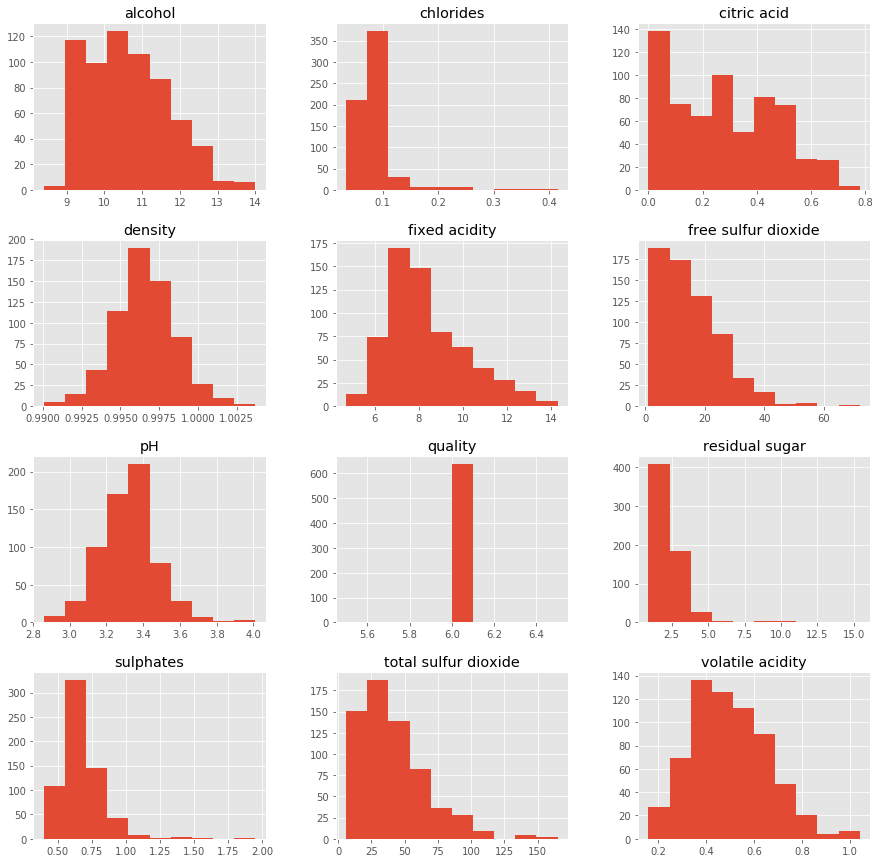

In [138]:
another_red = red[red['quality']==6]
normalize([1,2,9,39], norm='max')
X = another_red[['quality', 'alcohol']].as_matrix()
normalize([e for e in X[:, 1]], norm='max')
plt.style.use('ggplot')
y1 = another_red['quality'].values
pd.DataFrame.hist(another_red, figsize = [15,15]);

In [137]:
red.corr( method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


From previous we see that the following variables are correlated with quality:

    Alcohol (+++)

    Volatile acidity (---)

    Citric acid (++)

    Fixed acidity (+)

    Sulphates need investigating (+)

    Total sulphur dioxide (-)

    Density (-)

    Chlorides (-)
__We will concentrate in the first three variables that show stronger correlation with quality.__

### Alcohol

In [140]:
summary_alcohol = red['alcohol'].describe()
summary_alcohol

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

# Play comics!

In [125]:
comic = pd.read_csv('data/comic.csv', sep=',', low_memory=False)

In [126]:
comic

,brand_name,brand_year_began,brand_notes,brand_url,brand_issue_count,issue_number,issue_issue_date,issue_page_count,issue_editing,issue_on_sale_date,...,serie_publication_dates,story_title,story_feature,story_page_count,story_script,story_pencils,story_inks,story_letters,story_genre,story_characters
0,Timely Comics [small shield],1942.0,The most commonly used (on outside covers) of ...,NaN,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",NaN,...,December 1939 - June 1949,"""Human Torch and Sub-Mariner hold off the Jap ...",The Human Torch and the Sub-Mariner,1.00,?,Alex Schomburg [as Schomburg] (signed),Alex Schomburg [as Schomburg] (signed),?,superhero,Human Torch [Jim Hammond]; Sub-Mariner
1,Timely Comics [small shield],1942.0,The most commonly used (on outside covers) of ...,NaN,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",NaN,...,December 1939 - June 1949,The Dynamite Saboteurs,Human Torch,12.00,Carl Burgos [as Burgos] (signed),Carl Burgos [as Burgos] (signed),Carl Burgos [as Burgos] (signed),?,superhero,"Human Torch; Toro; Romo (villain, introduction..."
2,Timely Comics [small shield],1942.0,The most commonly used (on outside covers) of ...,NaN,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",NaN,...,December 1939 - June 1949,The Sub-Mariner Slugs the Sahara Scavengers,Sub-Mariner,12.00,?,"Carl Pfeufer [from Funnies, Inc. [the Jacquet ...","Carl Pfeufer [from Funnies, Inc. [the Jacquet ...","Funnies, Inc. [the Jacquet Shop]",superhero,"Von Ratter (Villain, Introduction); Von Rommel..."
3,Timely Comics [small shield],1942.0,The most commonly used (on outside covers) of ...,NaN,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",NaN,...,December 1939 - June 1949,Jap Trap,NaN,2.00,Mickey Spillane,NaN,NaN,typeset,NaN,NaN
4,Timely Comics [small shield],1942.0,The most commonly used (on outside covers) of ...,NaN,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",NaN,...,December 1939 - June 1949,The Giant Octopus Menace,Vision,7.00,?,Al Plastino ?; Syd Shores ? (see notes),Al Plastino ?; Al Gabrielle ? (see notes),?,superhero,"The Vision; A mad scientist (villain, introduc..."
5,Timely Comics [small shield],1942.0,The most commonly used (on outside covers) of ...,NaN,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",NaN,...,December 1939 - June 1949,Treachery Deals a Double-Cross,Patriot,7.00,?,Al Plastino,Al Plastino,?,superhero,The Patriot [Jeff Mace]; The Japanese (villain...
6,Timely Comics [small shield],1942.0,The most commonly used (on outside covers) of ...,NaN,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",NaN,...,December 1939 - June 1949,The Case of the Bogus Stamp Salesman!,Terry Vance,7.00,Ray Gill,Bob Oksner [as Oksner] (signed),Bob Oksner [as Oksner] (signed),?,detective-mystery,Terry Vance; Deadline Dawson (guest-star); Tor...
7,Timely Comics [small shield],1942.0,The most commonly used (on outside covers) of ...,NaN,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",NaN,...,December 1939 - June 1949,The Tunnel To China,Jimmy Jupiter,7.00,Ed Robbins,Ed Robbins,Ed Robbins,?,children; fantasy,"The White Rabbit (from ALICE IN WONDERLAND, in..."
8,Timely Comics [small shield],1942.0,The most commonly used (on outside covers) of ...,NaN,7,33,1942-07-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",NaN,...,December 1939 - June 1949,The House of the Living Dead,Angel,10.00,?,Alex Blum,Alex Blum,?,superhero,"The Angel; Dr. Merkel (villain, introduction, ..."
9,Timely Comics [small shield],1942.0,The most commonly used (on outside covers) of ...,NaN,7,34,1942-08-00,68.0,"Funnies, Inc. [Lloyd Jacquett]",NaN,...,December 1939 - June 1949,"""Can the Human Torch's death-defying leap save...",The Human Torch,1.00,?,Alex Schomburg,Alex Schomburg,?,superhero,Human Torch; Toro


In [127]:
comic.columns

Index(['brand_name', 'brand_year_began', 'brand_notes', 'brand_url',
       'brand_issue_count', 'issue_number', 'issue_issue_date',
       'issue_page_count', 'issue_editing', 'issue_on_sale_date',
       'issue_rating', 'publisher_name', 'publisher_year_began',
       'publisher_year_ended', 'publisher_series_count', 'series_name',
       'series_sort_name', 'series_year_began', 'serie_year_ended',
       'serie_publication_dates', 'story_title', 'story_feature',
       'story_page_count', 'story_script', 'story_pencils', 'story_inks',
       'story_letters', 'story_genre', 'story_characters'],
      dtype='object')

In [37]:
average_story_per_page_count = np.nanmean(comic['story_page_count'])
average_story_per_page_count

6.5732400988552104

In [38]:
average_issue_per_page_count = np.nanmean(comic['issue_page_count'])
average_issue_per_page_count

107.97344587087655

In [153]:
comic['issue_year'] = comic.apply(lambda row: str(row['issue_issue_date']).split('-')[0], axis=1)

In [154]:
comic_2017 = comic[comic['issue_year'] == '2017']

In [155]:
comic_2016 = comic[comic['issue_year'] == '2016']

In [165]:
frame = [comic_2017, comic_2016, comic[['story_genre', 'series_sort_name', 'story_characters']]]

In [166]:
result = pd.concat(frame)

In [167]:
result

,brand_issue_count,brand_name,brand_notes,brand_url,brand_year_began,issue_editing,issue_issue_date,issue_number,issue_on_sale_date,issue_page_count,...,series_year_began,story_characters,story_feature,story_genre,story_inks,story_letters,story_page_count,story_pencils,story_script,story_title
159289,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Mark D. Beazley (collection editor); Caitlin O...,2017-04-19,4,2017-04-19,292.0,...,2009.0,Spider-Man 2099 [Miguel O'Hara]; Strange 2099,Spder-Man 2099,superhero,Stephen Baskerville,typeset,1.0,Andrew Wildman,NaN,NaN
164526,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Cory Sedlmeier,2017-03-29,5,2017-03-29,532.0,...,2014.0,X-Men [Colossus; Storm; Nightcrawler; Banshee;...,X-Men,superhero,Dave Cockrum,typeset,1.0,Dave Cockrum,NaN,Second Genesis
166003,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant editor),2017-01-00,25,2016-11-23,40.0,...,2015.0,Luke Skywalker; Leia Organa; C-3PO; R2-D2,Star Wars,math & science,Jordie Bellaire,?,10.0,Jordie Bellaire,Chris Eliopoulos,Droid Dilemma
166004,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant editor),2017-01-00,25,2016-11-23,40.0,...,2015.0,Luke Skywalker; Leia Organa; Han Solo; Chewbac...,Star Wars,science fiction,Jorge Molina,Joe Caramagna,20.0,Jorge Molina,Jason Aaron,"Book V, Part V: The Last Flight of the Harbinger"
166005,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant editor),2017-01-00,25,2016-11-23,40.0,...,2015.0,NaN,Star Wars,science fiction,NaN,typeset,1.0,NaN,?,NaN
166006,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant editor),2017-01-00,25,2016-11-23,40.0,...,2015.0,Luke Skywalker; Leia Organa,Star Wars,science fiction,Mike Deodato (signed),NaN,1.0,Mike Deodato (signed),NaN,NaN
166007,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant edit...,2017-01-00,25,2016-11-23,40.0,...,2015.0,IG-88,Star Wars,science fiction,John Tyler Christopher,typeset,1.0,John Tyler Christopher,NaN,NaN
166008,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant edit...,2017-01-00,25,2016-11-23,NaN,...,2015.0,NaN,Star Wars,science fiction,Mike Deodato,typeset,1.0,Mike Deodato,NaN,NaN
166009,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant edit...,2017-02-00,26,2016-12-28,32.0,...,2015.0,Luke Skywalker; Yoda; Obi Wan Kenobi,Star Wars,science fiction,Stuart Immonen,NaN,1.0,Stuart Immonen,NaN,NaN
166010,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant edit...,2017-02-00,26,2016-12-28,32.0,...,2015.0,NaN,Star Wars,science fiction,Salvador Larroca,Chris Eliopoulos,20.0,Salvador Larroca,Jason Aaron,"Book VI, Part I: Yoda's Secret War"


In [168]:
# General plotting function for the different information extracted
def plot_story_per_category(character, title, x_title, y_title, top_n=4, output_filename="plot.png"):
    comic_by_story = character.value_counts()
    fig, ax = plt.subplots()
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    ax.set_title(title)
    comic_by_story[:top_n].plot(ax=ax, kind='bar')
    fig.savefig(output_filename)
    fig.show()

<IPython.core.display.Javascript object>


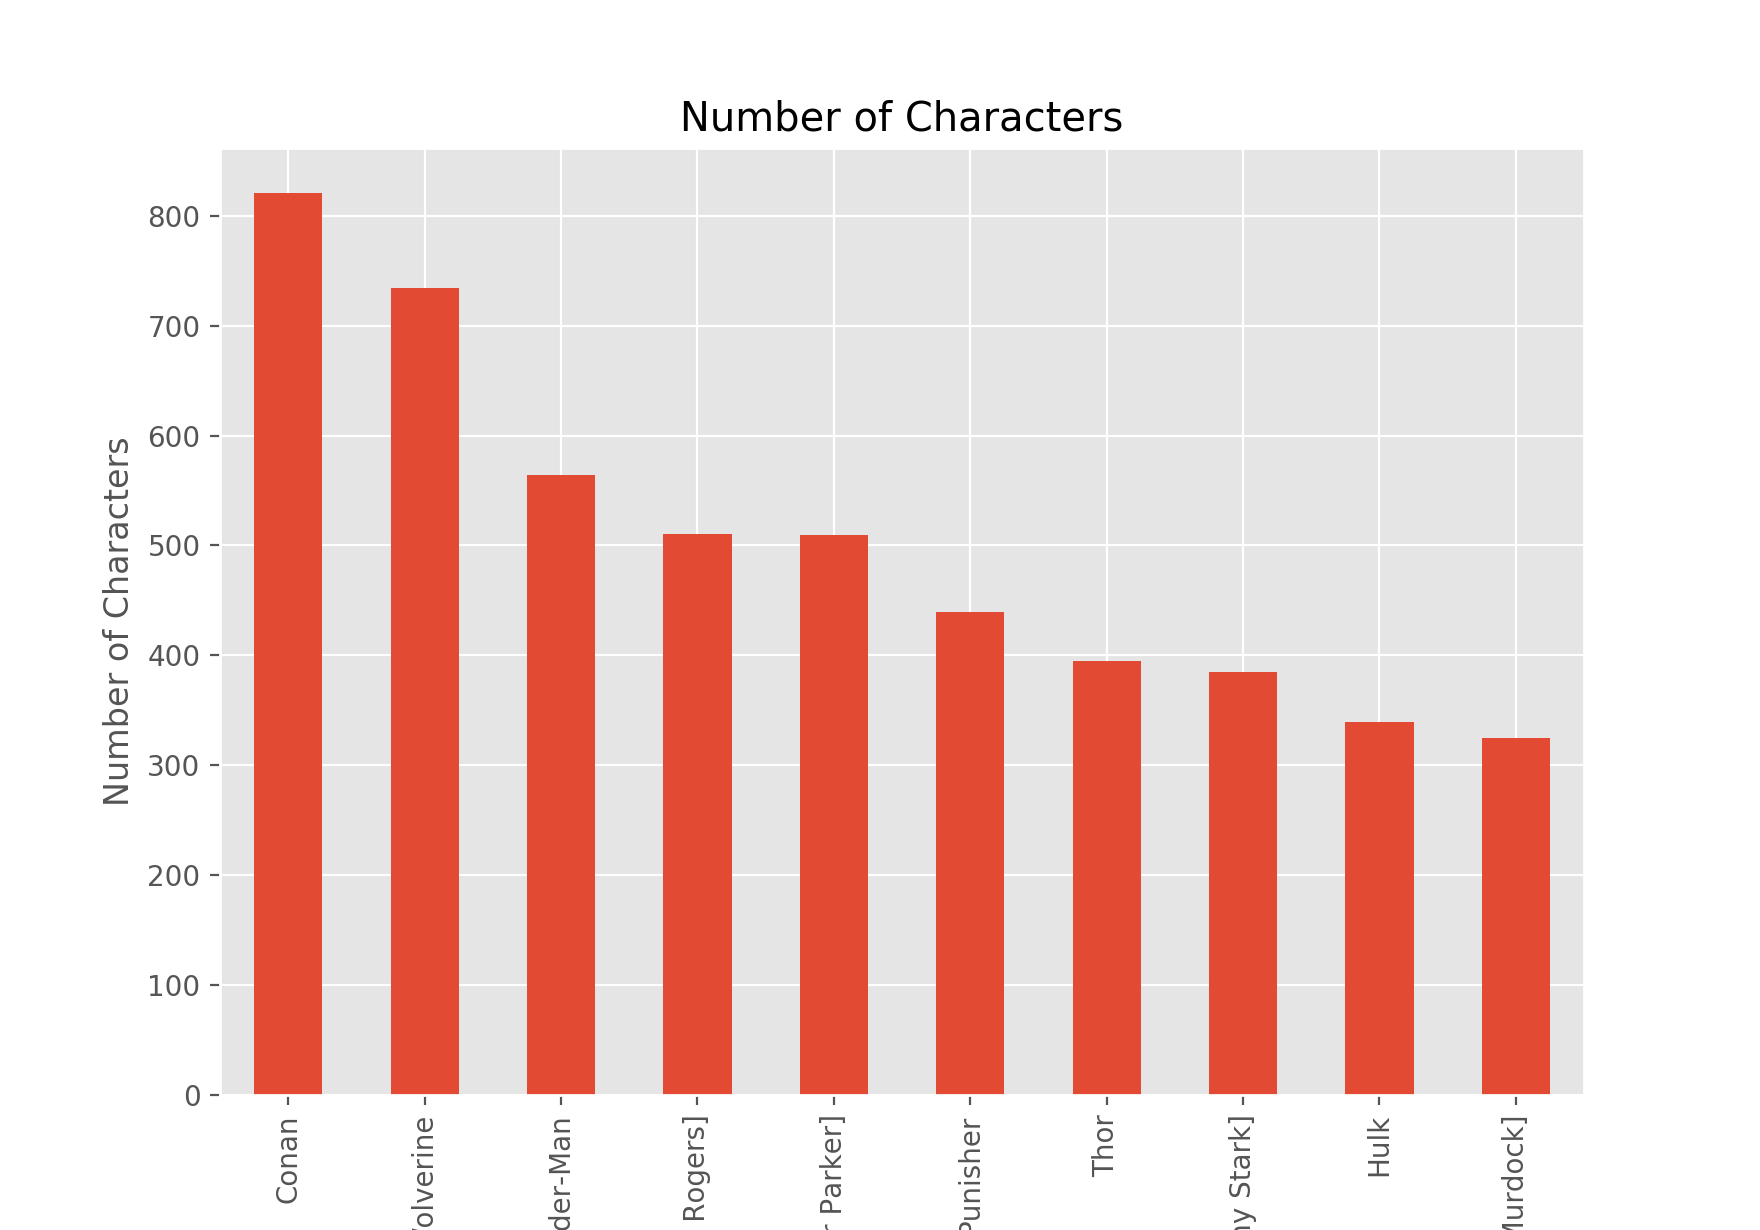

In [212]:
plot_story_per_category(result['story_characters'], "Number of Characters", 
                         "characters", 
                         "Number of Characters", 10, "img/story_chatacter.png")

<IPython.core.display.Javascript object>


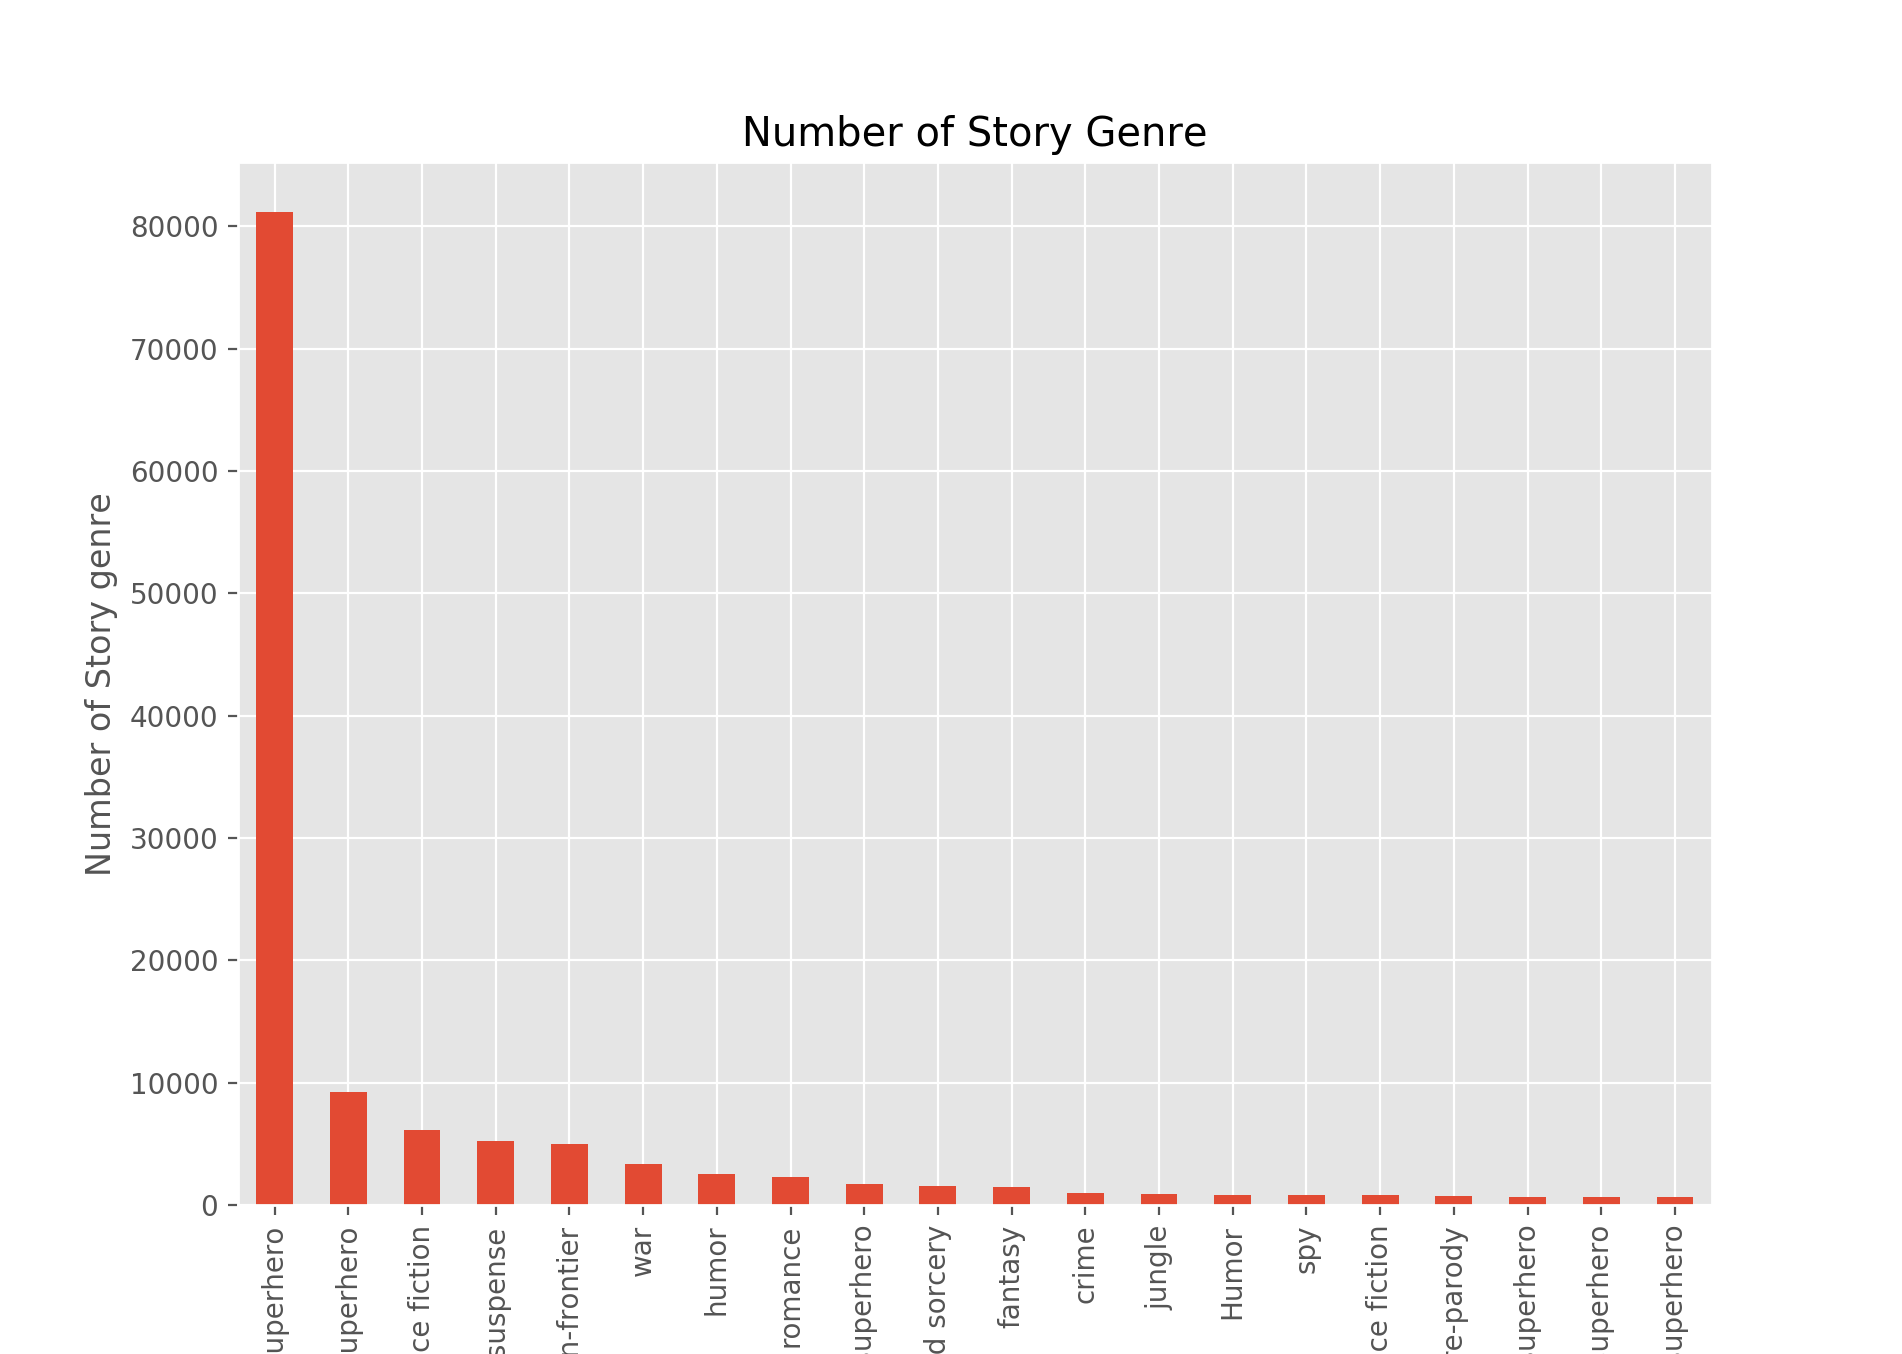

In [211]:
plot_story_per_category(result['story_genre'], "Number of Story Genre", 
                         "Story Genre", 
                         "Number of Story genre", 20, "img/story_genre.png")

<IPython.core.display.Javascript object>


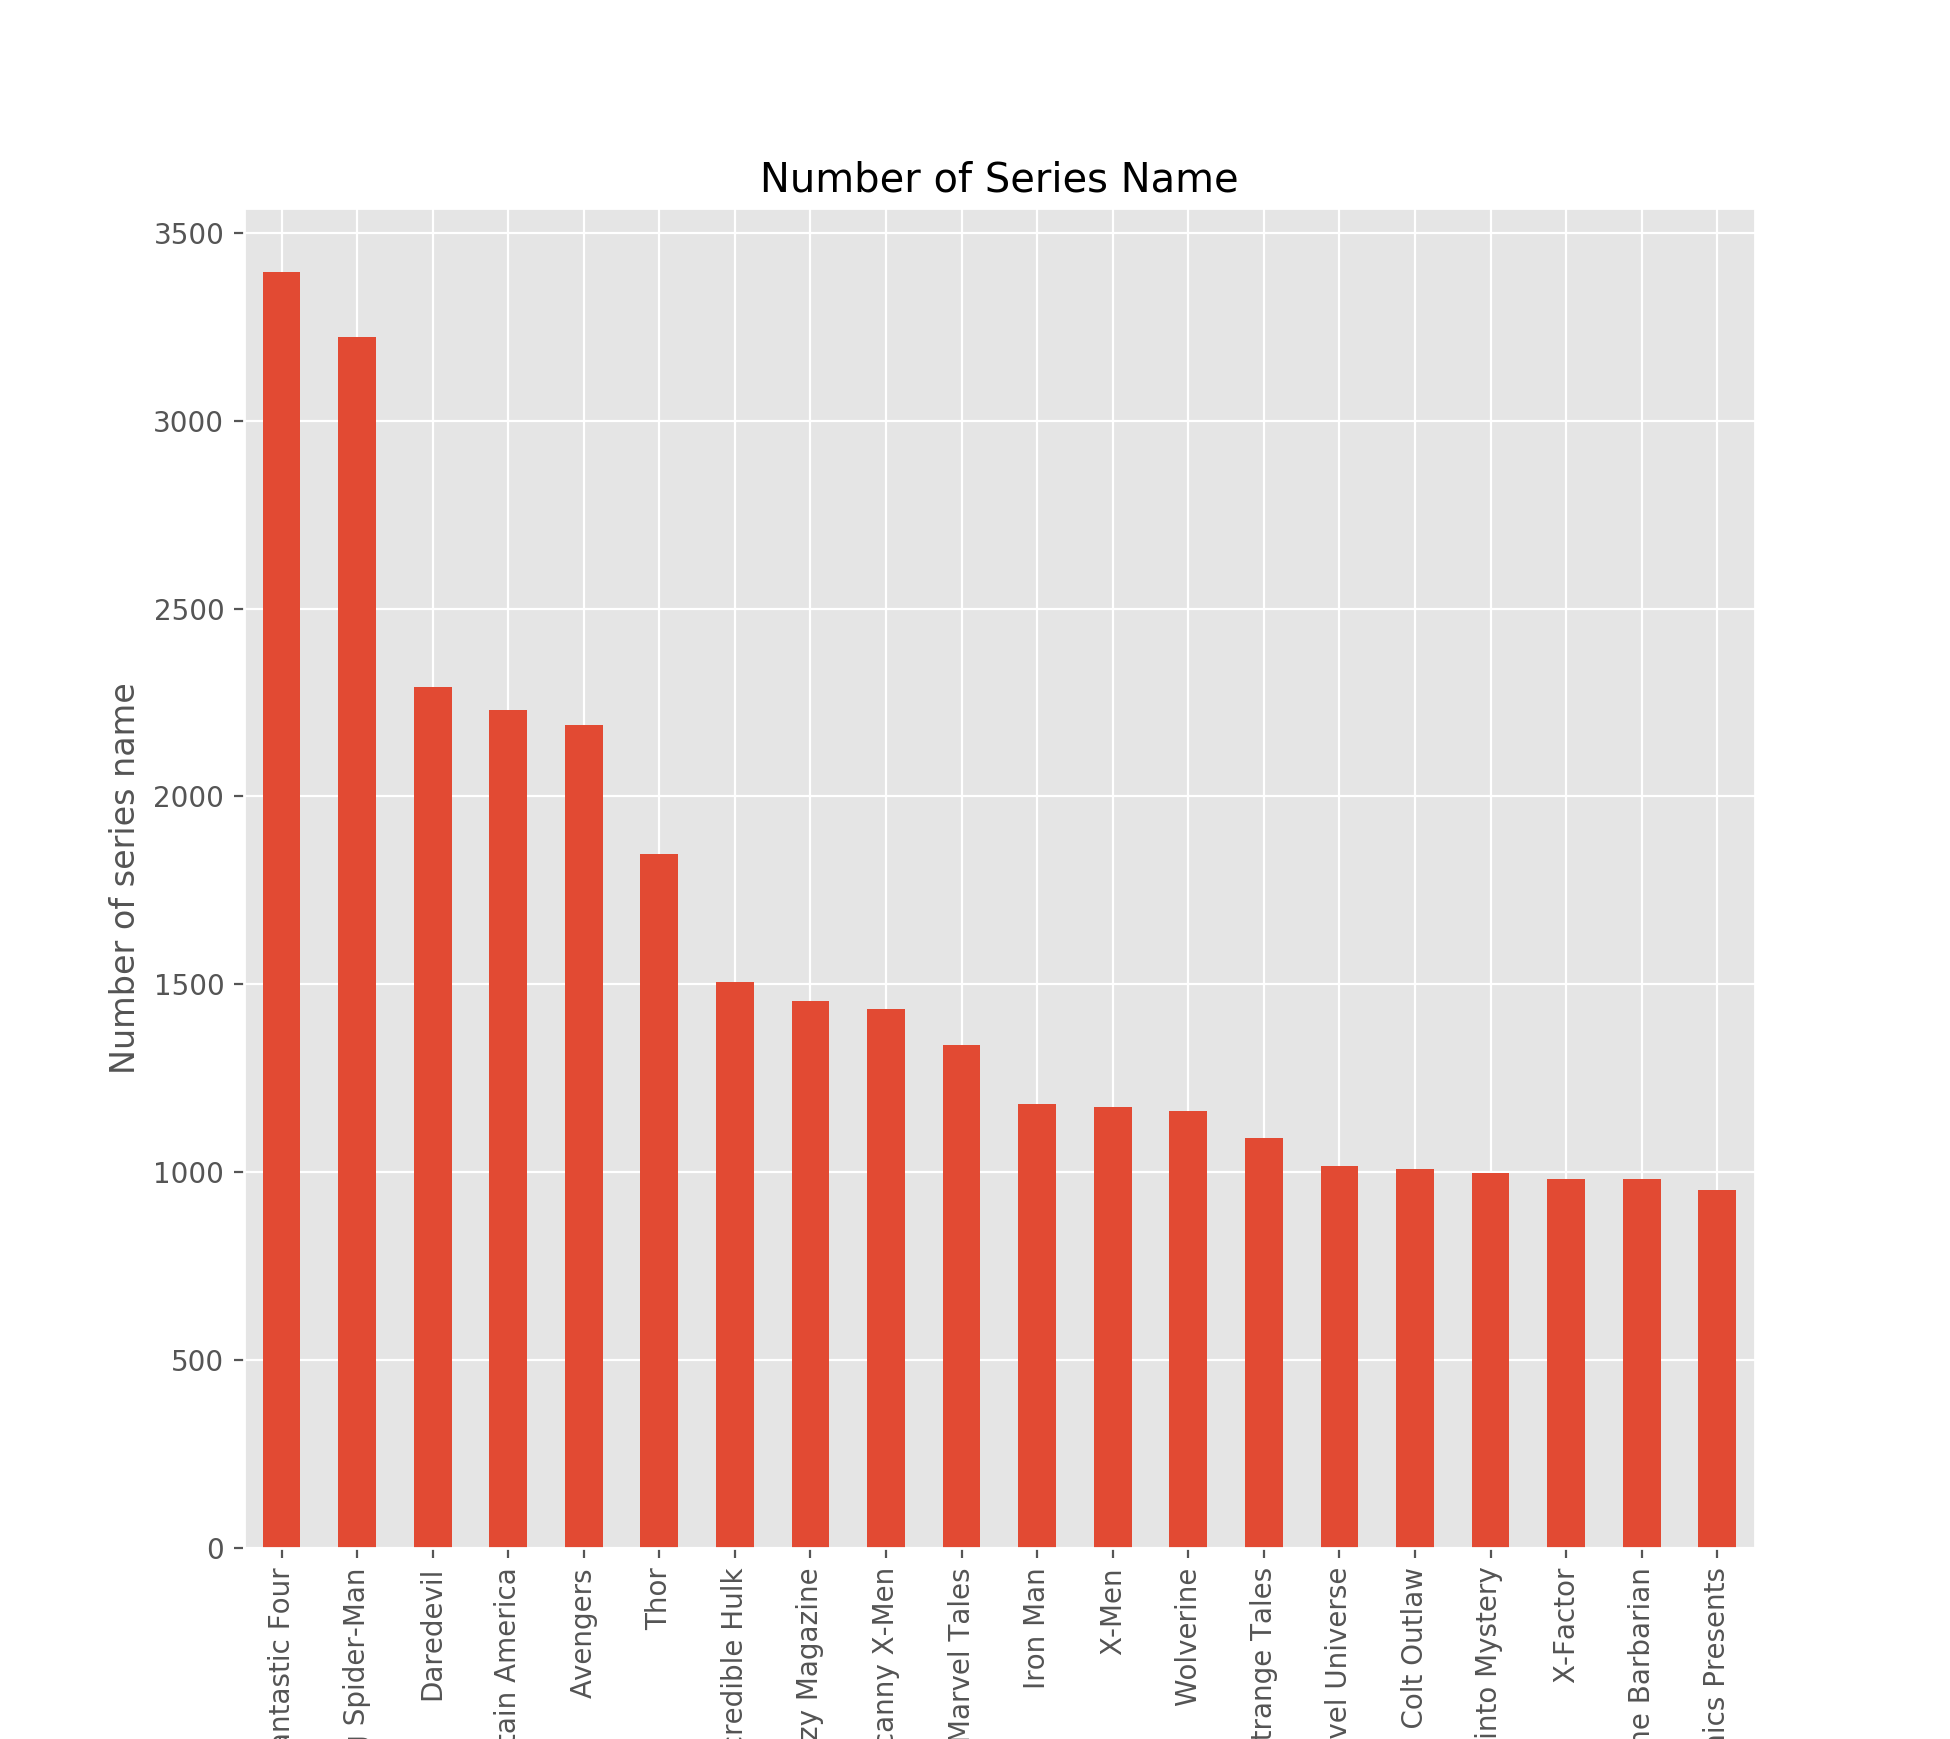

In [210]:
plot_story_per_category(result['series_sort_name'], "Number of Series Name", 
                         "Series name", 
                         "Number of series name", 20, "img/series_name.png")

In [182]:
issue_number_more_than_5 = result[result['issue_number'] > '10']

In [183]:
issue_number_more_than_5

,brand_issue_count,brand_name,brand_notes,brand_url,brand_year_began,issue_editing,issue_issue_date,issue_number,issue_on_sale_date,issue_page_count,...,series_year_began,story_characters,story_feature,story_genre,story_inks,story_letters,story_page_count,story_pencils,story_script,story_title
159289,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Mark D. Beazley (collection editor); Caitlin O...,2017-04-19,4,2017-04-19,292.0,...,2009.0,Spider-Man 2099 [Miguel O'Hara]; Strange 2099,Spder-Man 2099,superhero,Stephen Baskerville,typeset,1.0,Andrew Wildman,NaN,NaN
164526,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Cory Sedlmeier,2017-03-29,5,2017-03-29,532.0,...,2014.0,X-Men [Colossus; Storm; Nightcrawler; Banshee;...,X-Men,superhero,Dave Cockrum,typeset,1.0,Dave Cockrum,NaN,Second Genesis
166003,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant editor),2017-01-00,25,2016-11-23,40.0,...,2015.0,Luke Skywalker; Leia Organa; C-3PO; R2-D2,Star Wars,math & science,Jordie Bellaire,?,10.0,Jordie Bellaire,Chris Eliopoulos,Droid Dilemma
166004,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant editor),2017-01-00,25,2016-11-23,40.0,...,2015.0,Luke Skywalker; Leia Organa; Han Solo; Chewbac...,Star Wars,science fiction,Jorge Molina,Joe Caramagna,20.0,Jorge Molina,Jason Aaron,"Book V, Part V: The Last Flight of the Harbinger"
166005,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant editor),2017-01-00,25,2016-11-23,40.0,...,2015.0,NaN,Star Wars,science fiction,NaN,typeset,1.0,NaN,?,NaN
166006,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant editor),2017-01-00,25,2016-11-23,40.0,...,2015.0,Luke Skywalker; Leia Organa,Star Wars,science fiction,Mike Deodato (signed),NaN,1.0,Mike Deodato (signed),NaN,NaN
166007,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant edit...,2017-01-00,25,2016-11-23,40.0,...,2015.0,IG-88,Star Wars,science fiction,John Tyler Christopher,typeset,1.0,John Tyler Christopher,NaN,NaN
166008,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant edit...,2017-01-00,25,2016-11-23,NaN,...,2015.0,NaN,Star Wars,science fiction,Mike Deodato,typeset,1.0,Mike Deodato,NaN,NaN
166009,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant edit...,2017-02-00,26,2016-12-28,32.0,...,2015.0,Luke Skywalker; Yoda; Obi Wan Kenobi,Star Wars,science fiction,Stuart Immonen,NaN,1.0,Stuart Immonen,NaN,NaN
166010,12519.0,Marvel [white on red],"Marvel started putting "".com"" in its logo box ...",NaN,2001.0,Jordan D. White; Heather Antos (assistant edit...,2017-02-00,26,2016-12-28,32.0,...,2015.0,NaN,Star Wars,science fiction,Salvador Larroca,Chris Eliopoulos,20.0,Salvador Larroca,Jason Aaron,"Book VI, Part I: Yoda's Secret War"


<IPython.core.display.Javascript object>


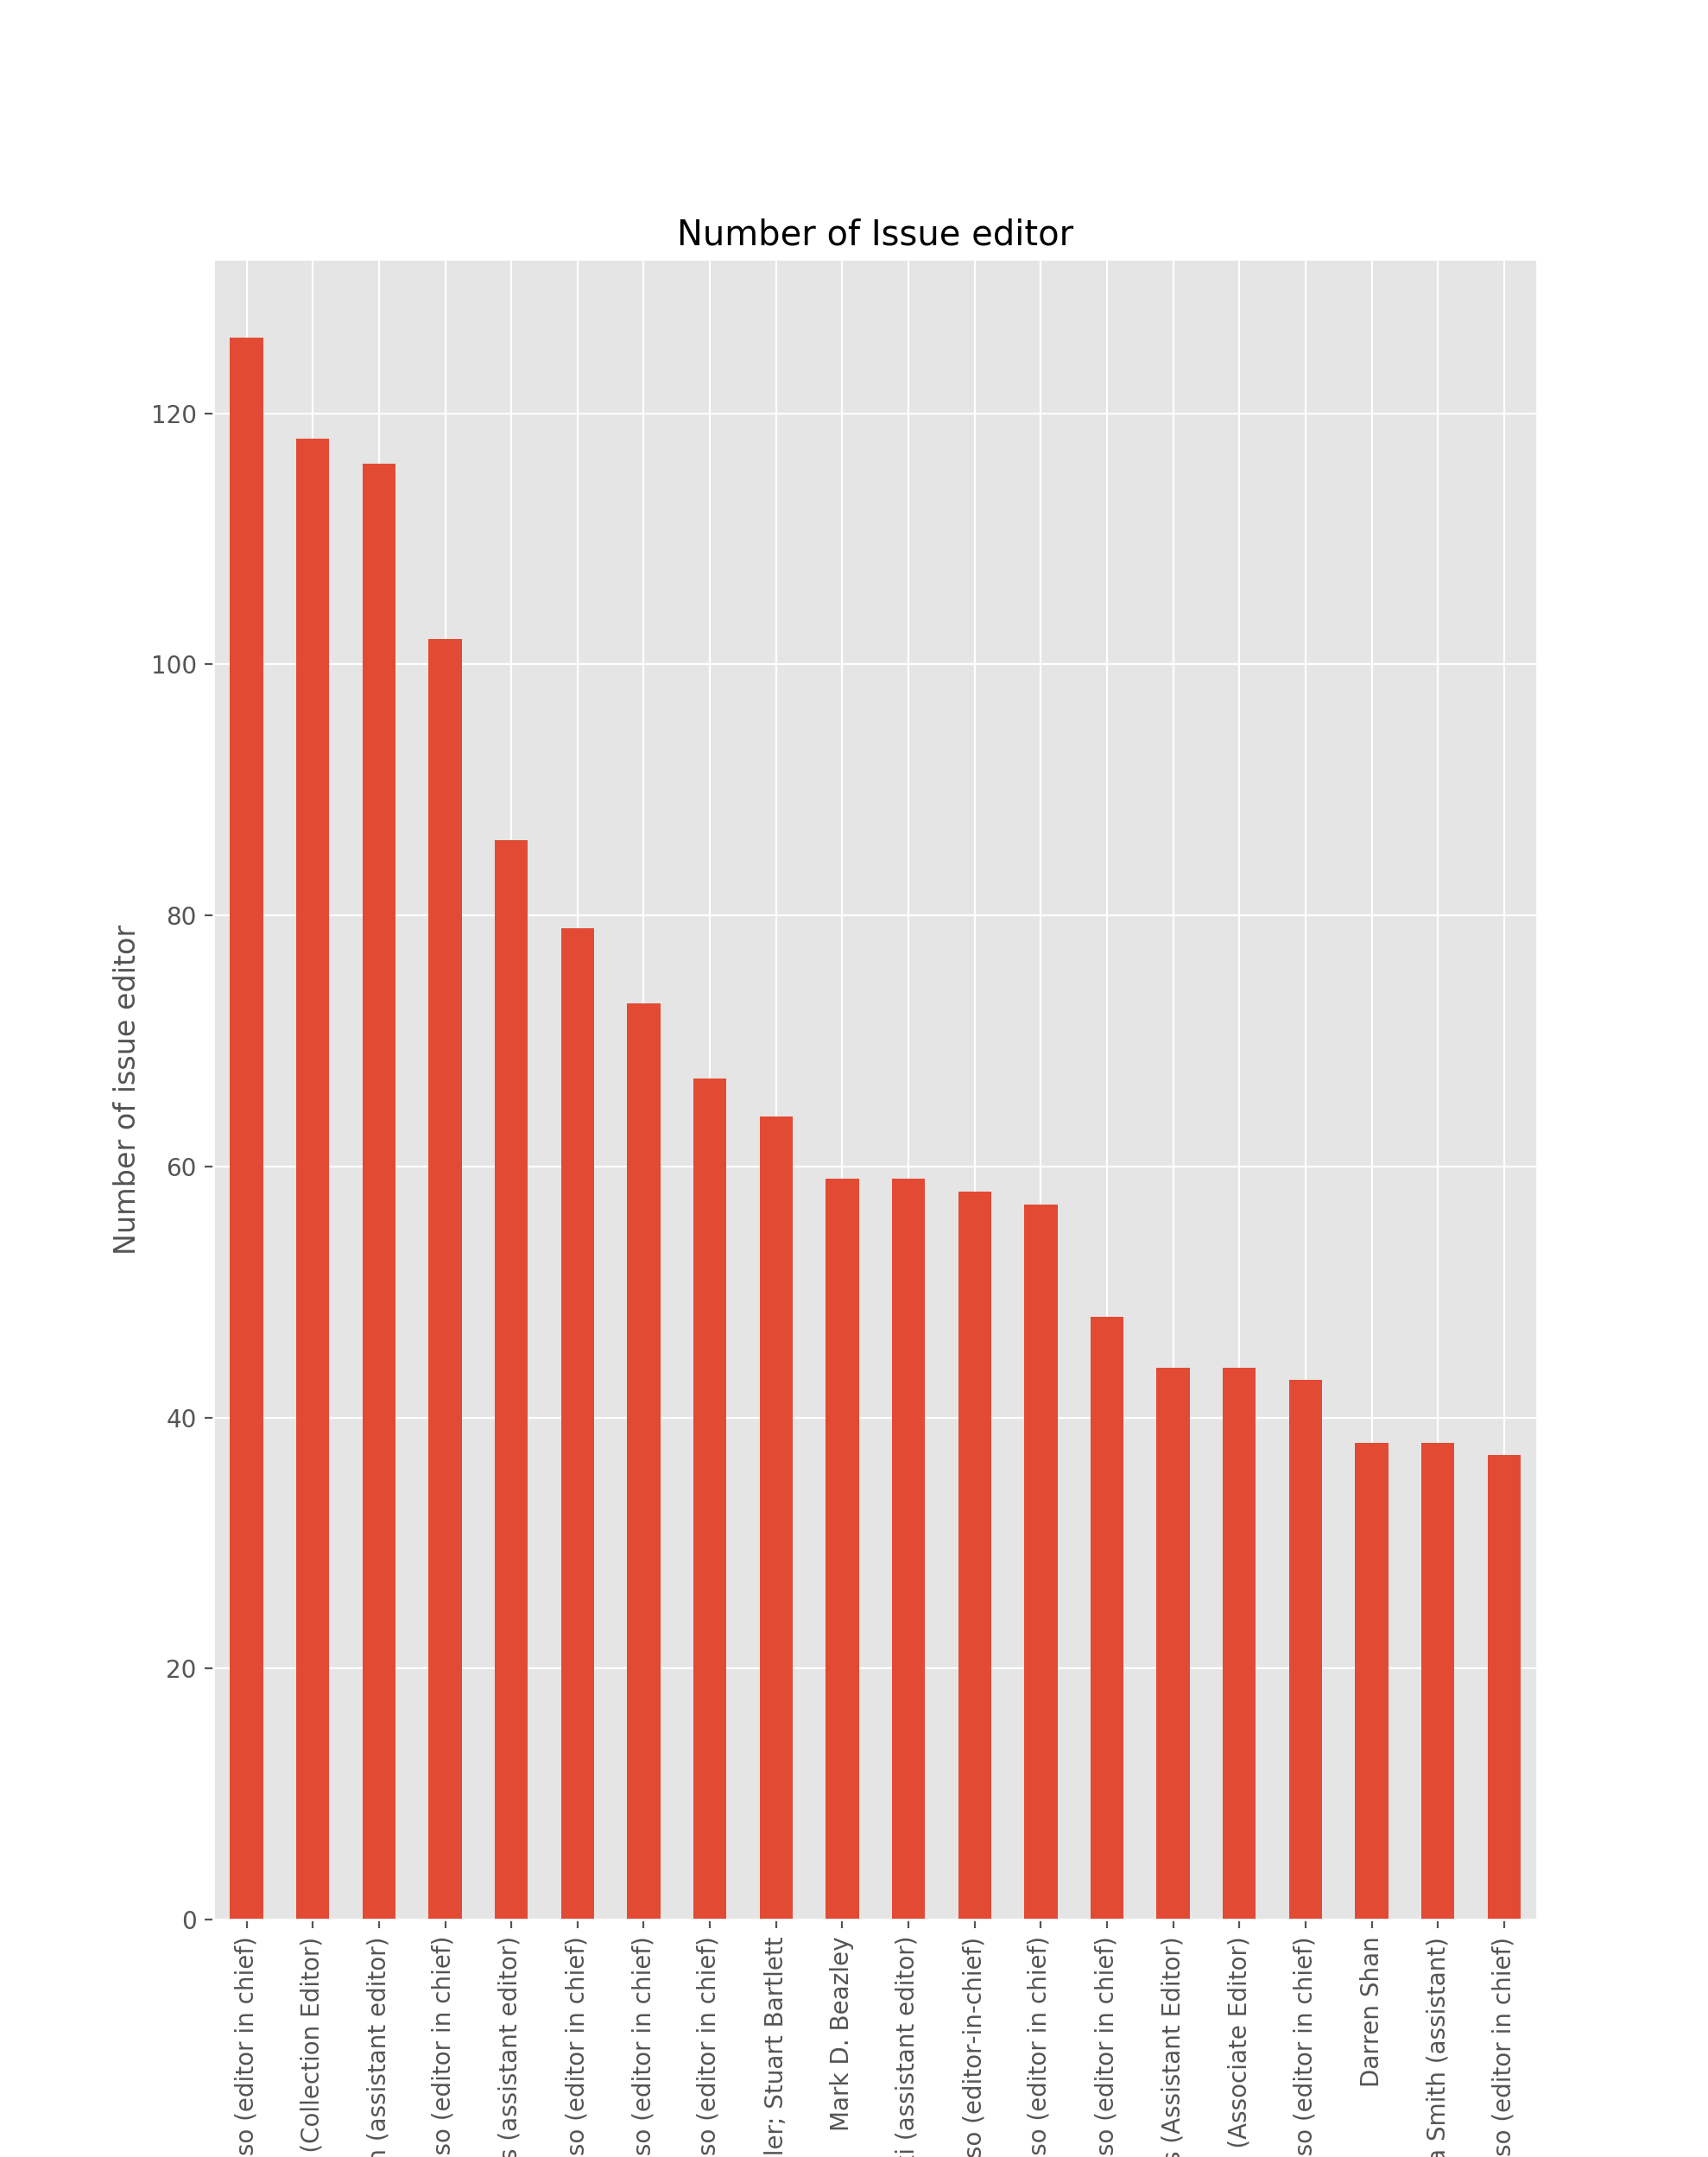

In [209]:
plot_story_per_category(issue_number_more_than_5['issue_editing'], "Number of Issue editor", 
                         "Issue Editor", 
                         "Number of issue editor", 20, "img/issue_edit_name.png")

<IPython.core.display.Javascript object>


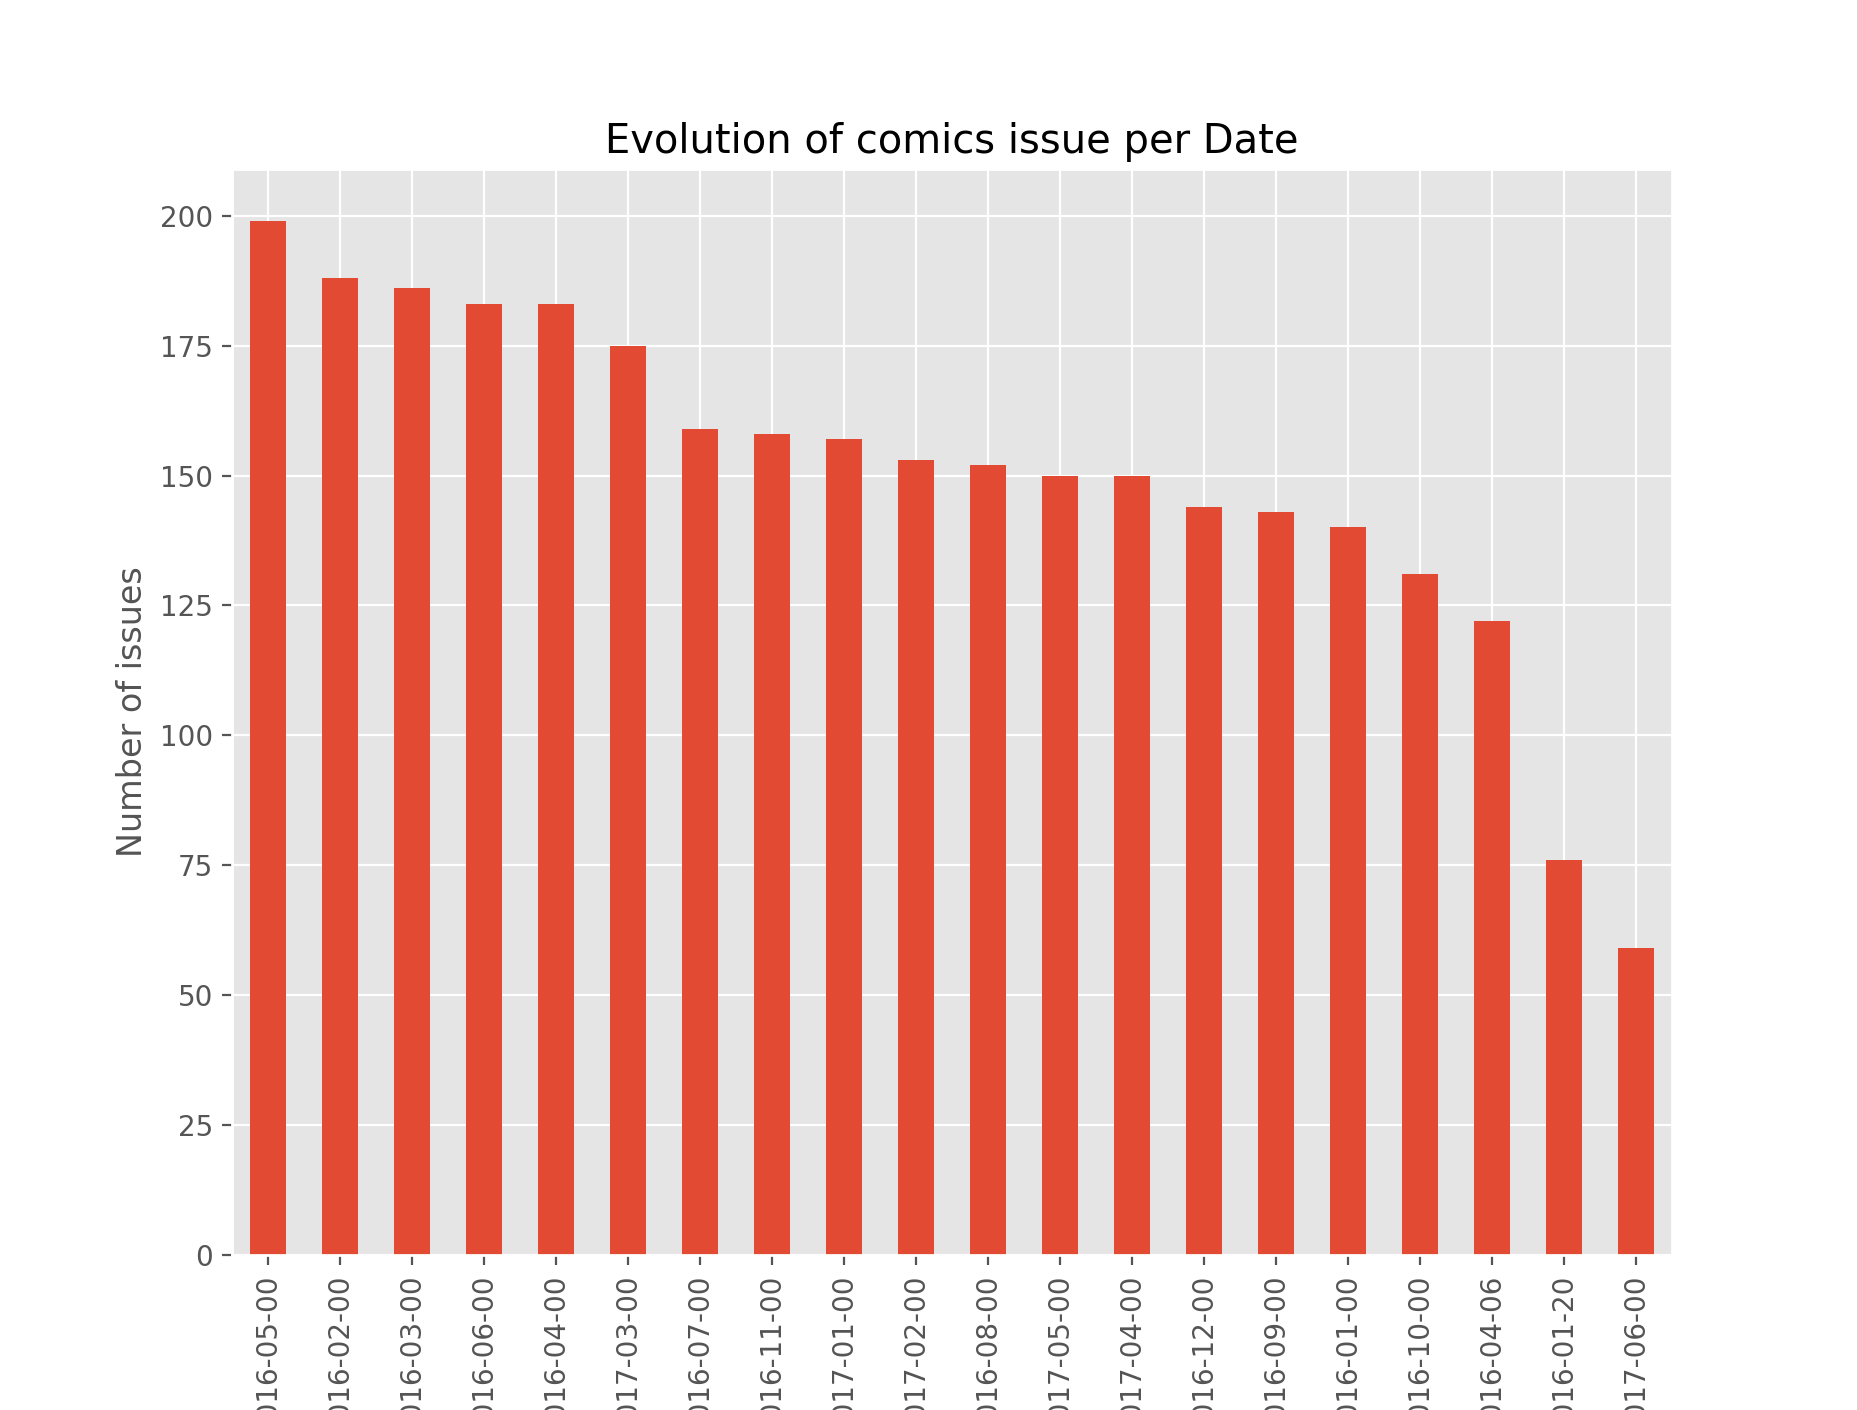

In [208]:
plot_story_per_category(issue_number_more_than_5['issue_issue_date'], "Evolution of comics issue per Date", 
                         "Issue Date", 
                         "Number of issues", 20, "img/issue_date.png")

<IPython.core.display.Javascript object>


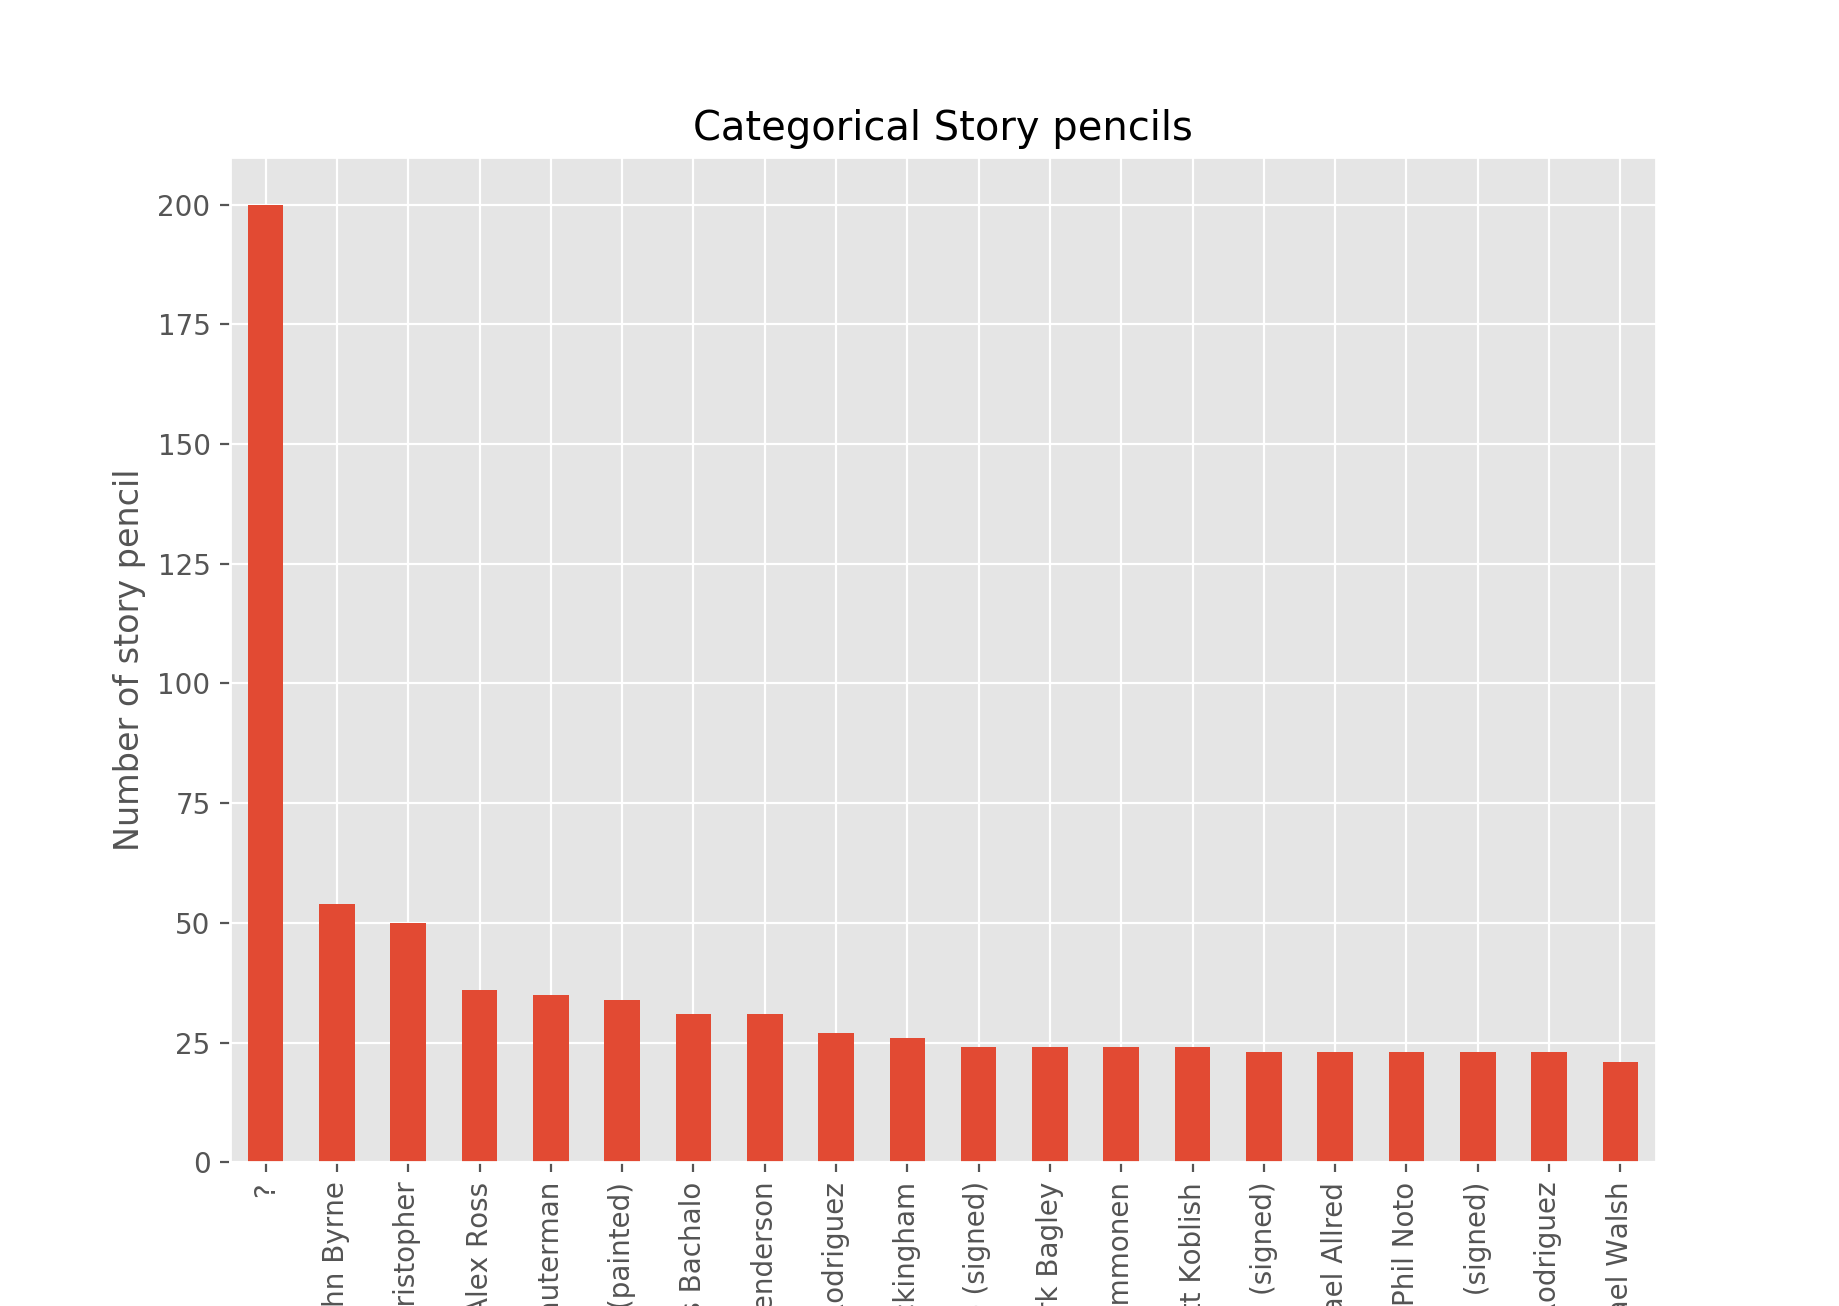

In [207]:
plot_story_per_category(issue_number_more_than_5['story_pencils'], "Categorical Story pencils", 
                         "Story pencil", 
                         "Number of story pencil", 20, "img/story_pencil.png")

<IPython.core.display.Javascript object>


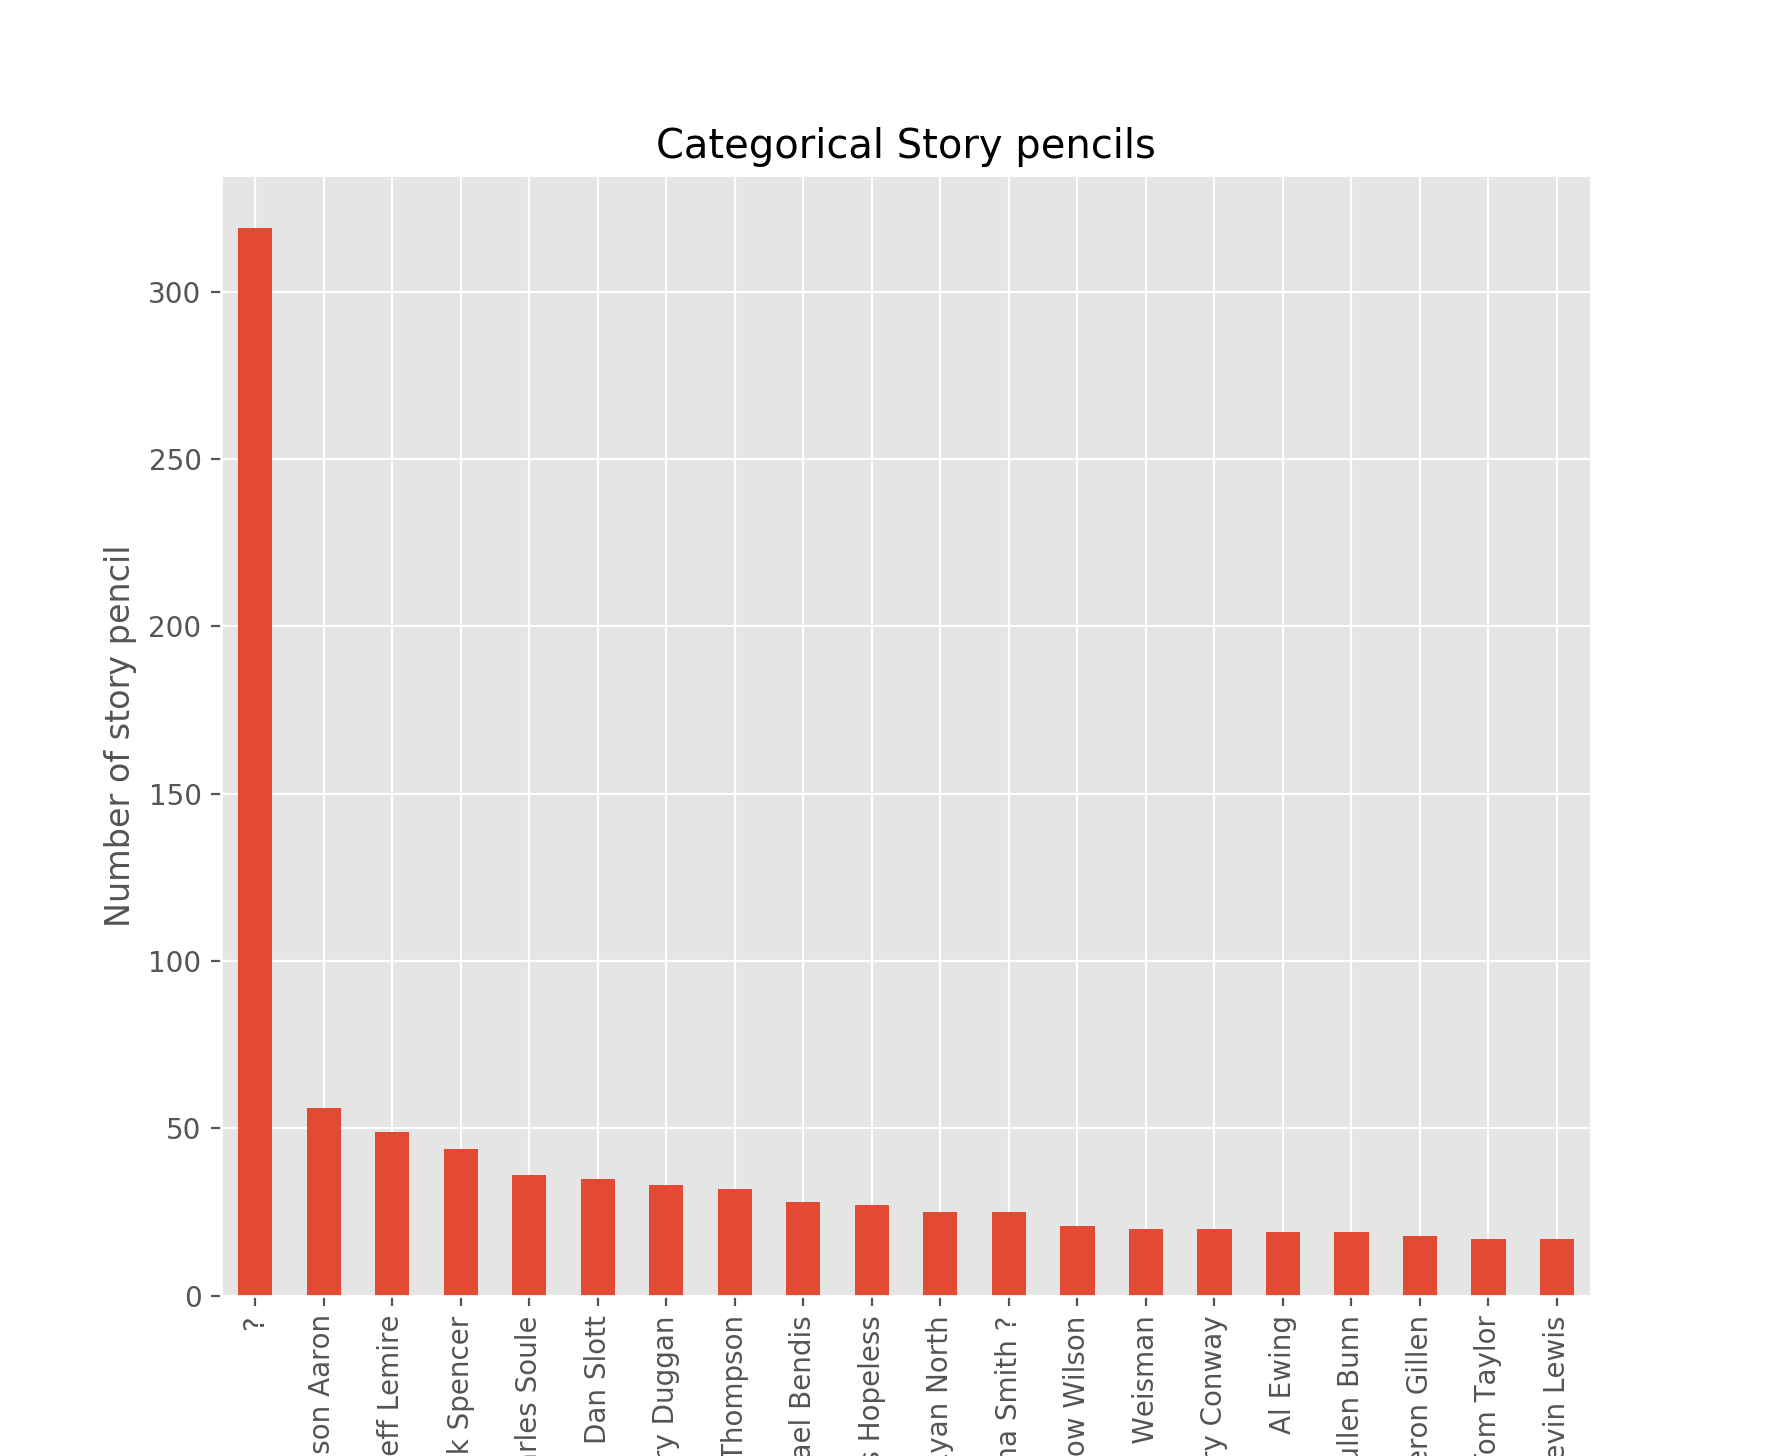

In [206]:
plot_story_per_category(issue_number_more_than_5['story_script'], "Categorical Story pencils", 
                         "Story pencil", 
                         "Number of story pencil", 20, "img/story_script.png")

<IPython.core.display.Javascript object>


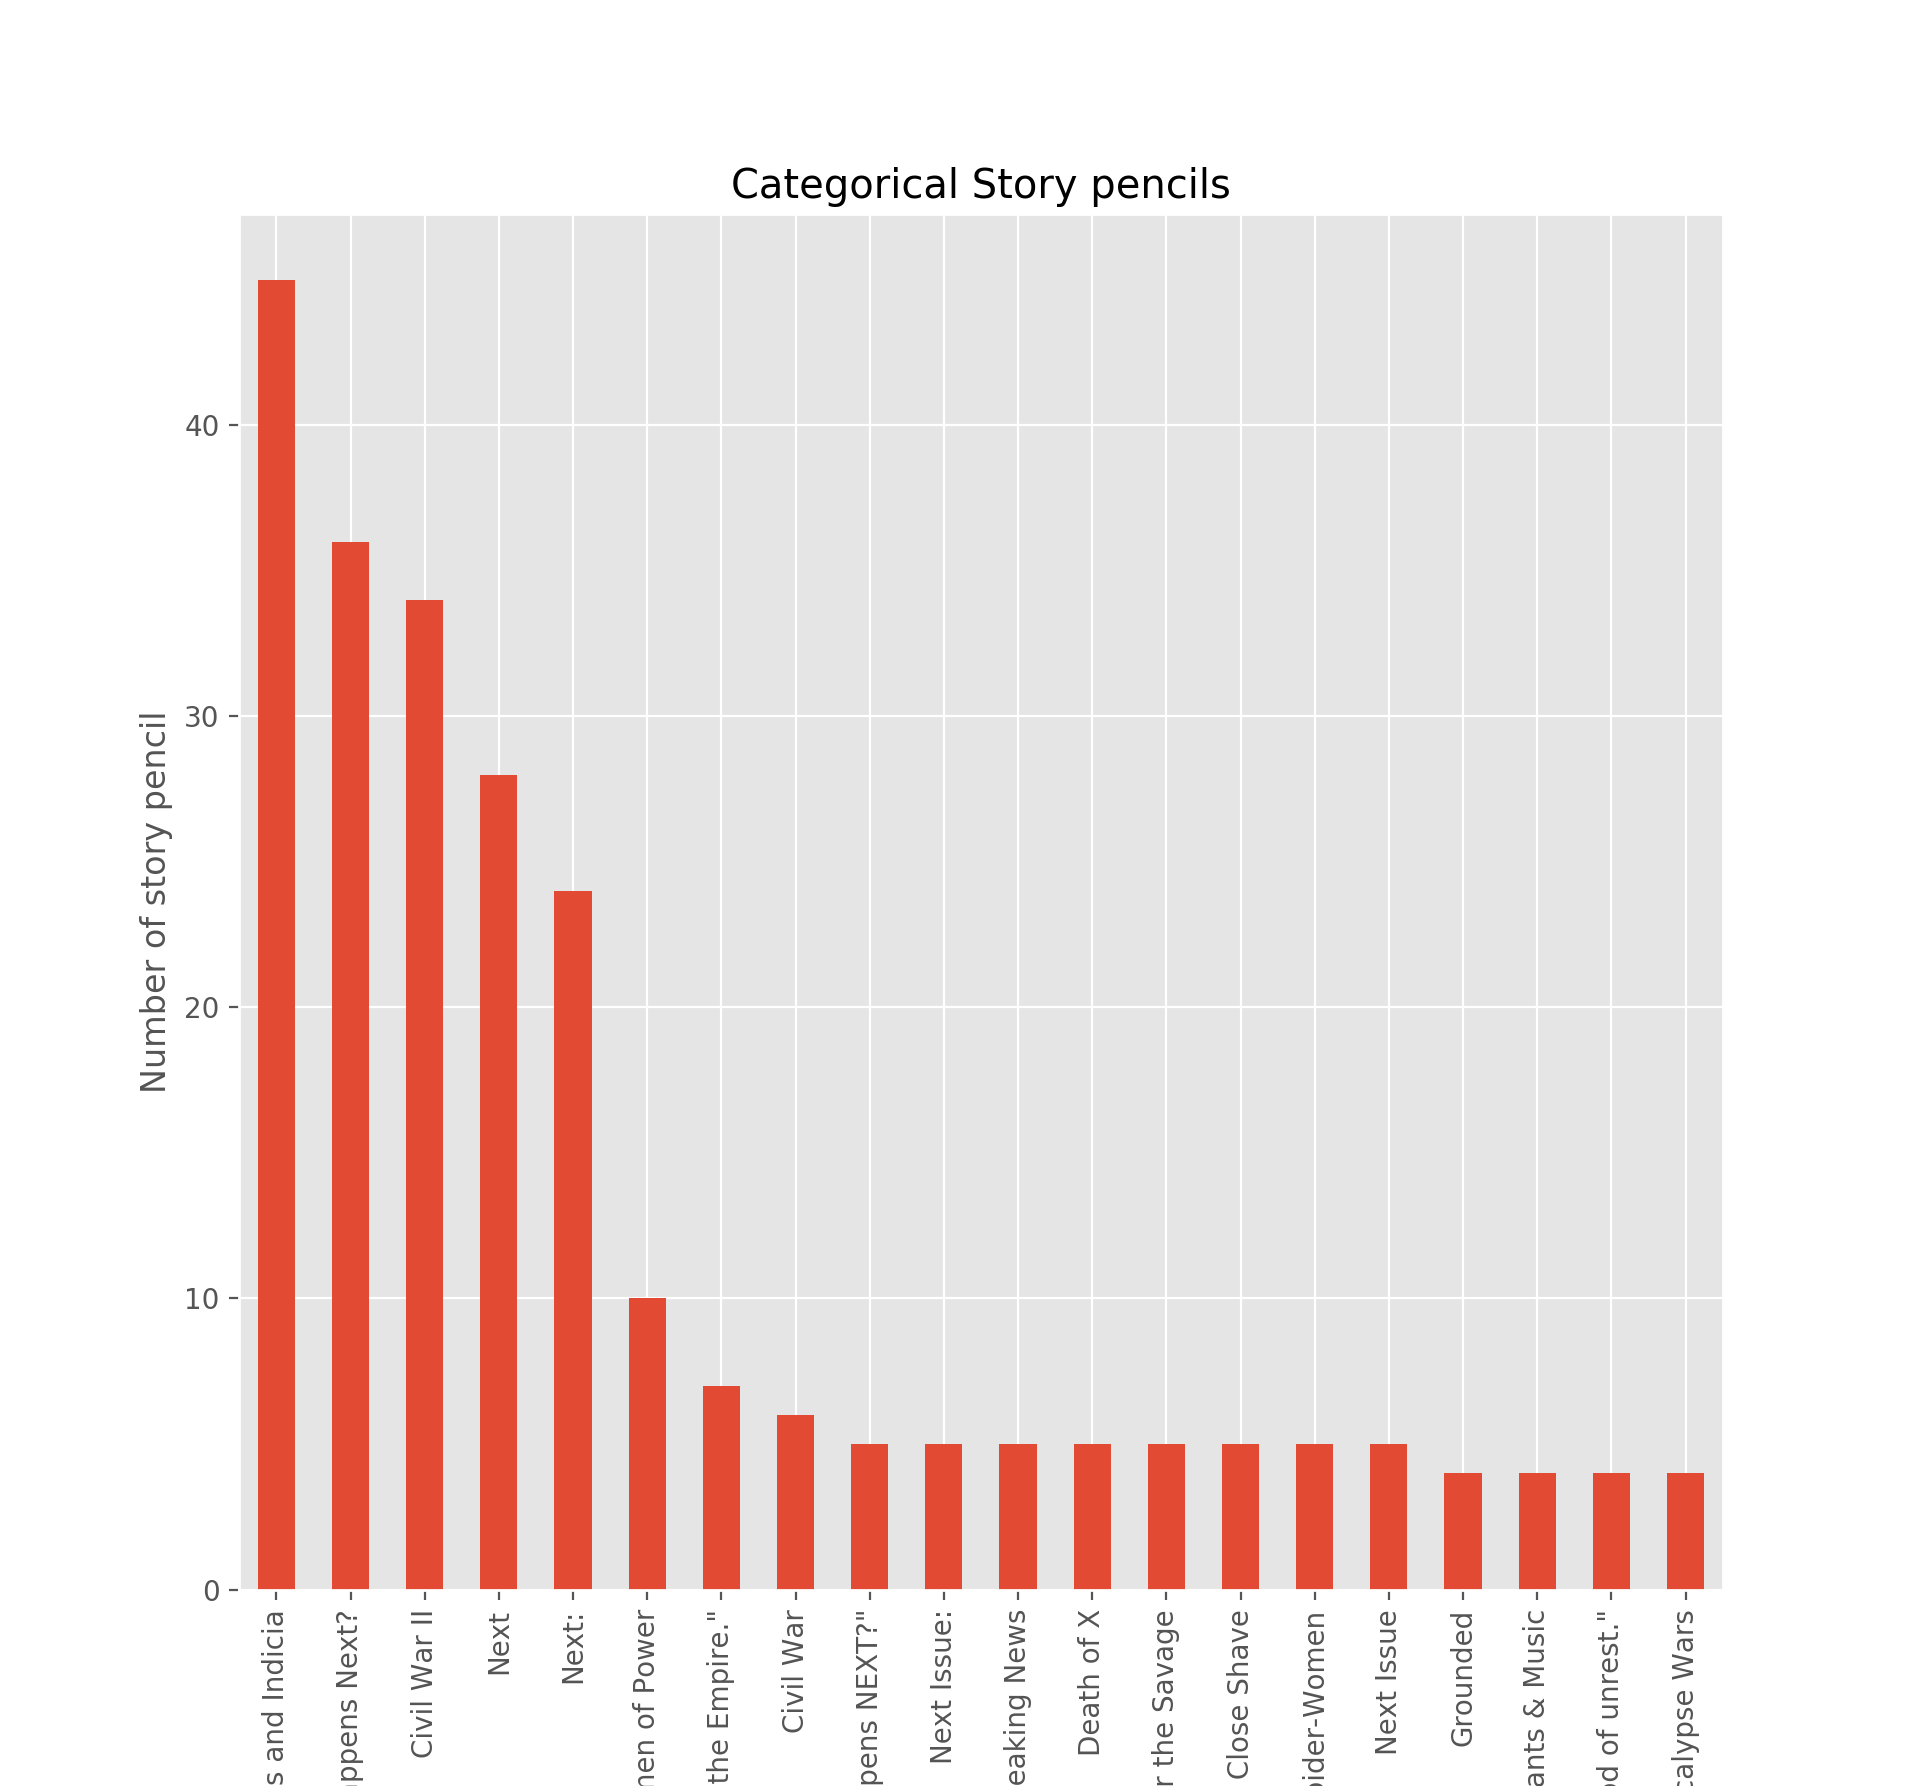

In [205]:
plot_story_per_category(issue_number_more_than_5['story_title'], "Categorical Story pencils", 
                         "Story pencil", 
                         "Number of story pencil", 20, "img/story_title.png")

In [201]:
issue_number_more_than_5[issue_number_more_than_5['story_title'] == 'Recap, Credits and Indicia']['story_inks'].value_counts()

?                    13
Russell Dauterman     5
various               5
Chris Bachalo ?       2
Victor Olazaba        1
Tim Townsend          1
Name: story_inks, dtype: int64

<IPython.core.display.Javascript object>


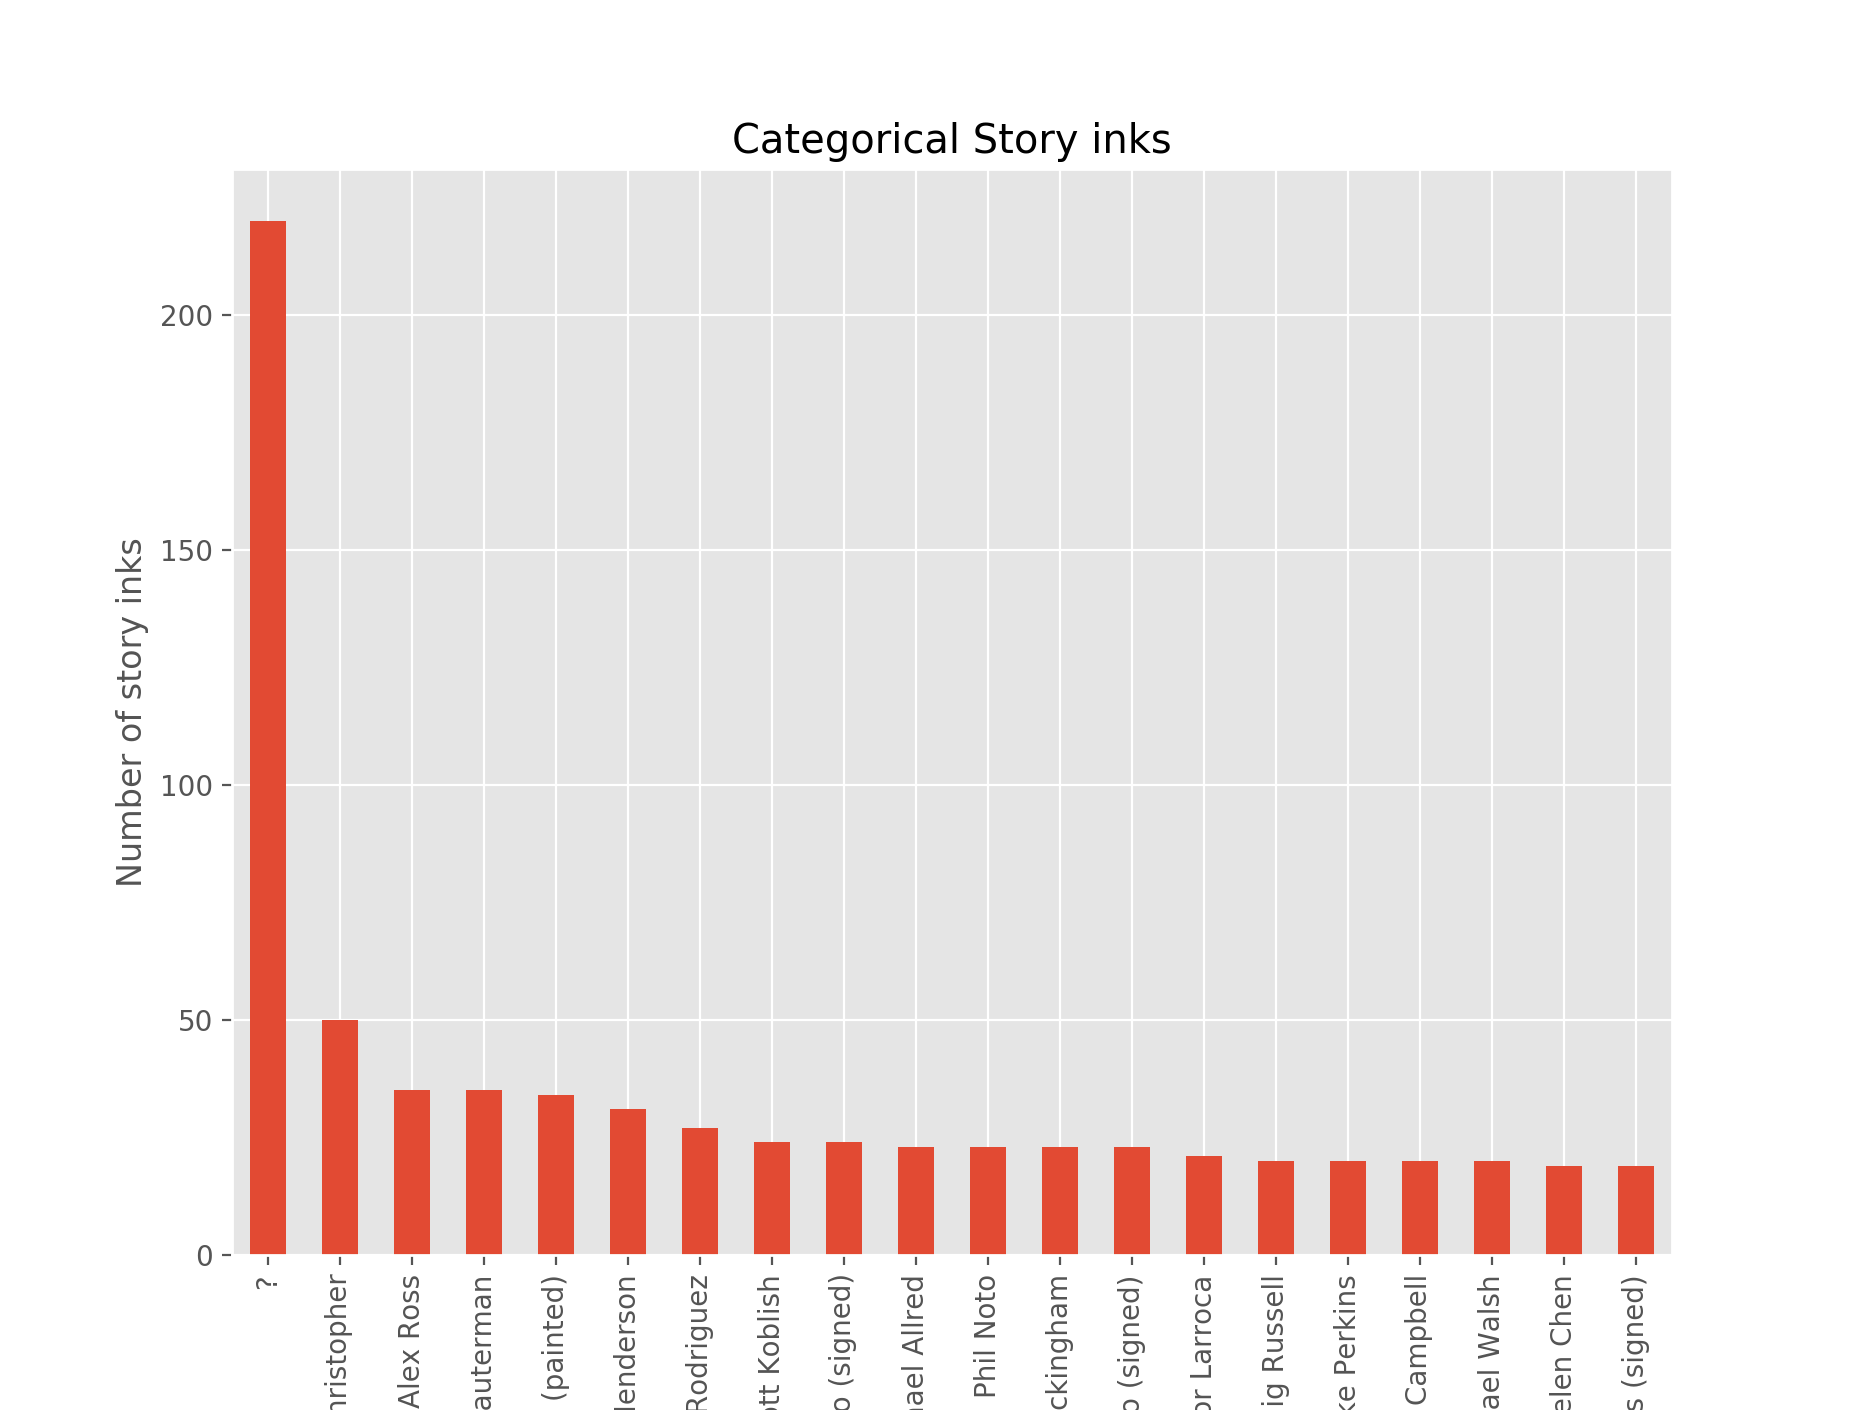

In [204]:
plot_story_per_category(issue_number_more_than_5['story_inks'], "Categorical Story inks", 
                         "Story inks", 
                         "Number of story inks", 20, "img/story_inks.png")